In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

#libray for model constructing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
#The Environment and Health Data Portal: Data: https://github.com/nychealth/EHDP-data

In [2]:
mobility_mode = pd.read_csv('mobility_mode.csv')
mobility_mode.head(3)

,qGENDER,qAGECODE,qRACECODE,qEDUCATION,qINCOME,qSURVEYZONE,qZIPHOME,qBOROUGH,qLICENSE,qCARACCESS,...,Ferry,Access-A-Ride,Membership_CarSharing,Disability_Hearing,Disability_Seeing,Disability_Walking,Disability_DailyActivity,Disability_Mental,Welfare,Freight_Usage
0,Female,35-44,"White, Non-Hispanic","Graduate degree (i.e., Master's, Professional,...","$150,000-$199,999",Inner Queens,11372.0,Queens,Yes,Yes,...,No,No,No,No,No,No,No,No,No,A few times a year
1,Male,45-54,"White, Non-Hispanic","Graduate degree (i.e., Master's, Professional,...","$200,000 and above",Outer Brooklyn,11235.0,Brooklyn,Yes,No,...,No,No,No,No,No,No,No,No,No,Several times a week
2,Male,35-44,"Black, Non-Hispanic","Associate degree (i.e., AA, AS)","$25,000 - $34,999",Southern Bronx,10467.0,The Bronx,No,No,...,No,No,Yes,No,No,No,No,No,NYCHA Tenant/Section8 Recipent,A few times a month


## Feature Selection
when both of variables are categorical, then the strength of the relationship between them can be measured using a Chi-square test
<hr>
Chi-square test finds the probability of a Null hypothesis(H0).

*   Assumption(H0): The two columns are NOT related to each other
*   Result of Chi-Sq Test: The Probability of H0 being True
*   the P-value came higher than 0.05. Hence H0 will be accepted,which means the variables are not correlated with each other




**Data Encoding**
encode nominal and ordinal data seperately

In [3]:
### how to handle overlapping class
# multi label classification
alter_col =['Walk', 'Train/Subway', 'Bus', 'Ferry', 'Access-A-Ride']

#use selectKBest from feature_selection
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
X = mobility_mode.loc[:,~mobility_mode.columns.isin(['Mode','qSURVEYZONE','qZIPHOME','qBOROUGH','Disability_DailyActivity','qEMPLOYMENTCODE']+alter_col)]
### how to handle overlapping class
# y = mobility_mode.loc[:,'Walk']
y_multi = mobility_mode.loc[:,mobility_mode.columns.isin(alter_col)]

In [4]:
oneHot = ['qRACECODE','qMARRIED','qRENT','qEMPLOYMENT','qINDUSTRY','qWORKLOCATION','Welfare']
ordinal = ['qAGECODE','qEDUCATION','qINCOME','qTRIPPLANAPP','gFREIGHT1b_qFREIGHT1_mA','gFREIGHT1b_qFREIGHT2_mA','gFREIGHT1b_qFREIGHT3_mA',
           'gFREIGHT1b_qFREIGHT4_mA','qAUTOVEHICLEFAM','qAUTOVEHICLEWILL','qAUTOVEHICLESAFE','qBUILDINGb','qCHILDREN','Freight_Usage','qWORKFH',
           'Disability_Walking','Disability_Mental','Disability_Seeing','Disability_Hearing','Membership_CarSharing','qCITIBIKE','qSMARTPHONE',
           'qCARACCESS','qLICENSE','qGENDER']

qAGECODE_cate = ['18-24','25-34','35-44','45-54','55-64','65 or older']
qEDUCATION_cate = ['No high school','Some high school','High school graduate or equivalent (i.e., GED)',
                   'Associate degree (i.e., AA, AS)','Some college but degree not received or in progress',
                   'Bachelor\'s degree (i.e., BA, BS, AB)','Graduate degree (i.e., Master\'s, Professional, Doctorate)']
qINCOME_cate = ['Less than $14,999','$15,000 - $24,999','$25,000 - $34,999','$35,000 - $49,999','$50,000 - $74,999',
                '$75,000 - $99,999','$100,000 - $149,999','$150,000-$199,999','$200,000 and above']
qTRIPPLANAPP_cate = ['Less than a few times a year','A few times a year','Less than once a month','Once a month','A few times a month',
                     'Once a week','Several times a week','Daily']
gFREIGHT1b_qFREIGHT1_mA_cate = ['Not applied','Less than a few times','A few times a year','A few times a month','Several times a week','Daily']
gFREIGHT1b_qFREIGHT2_mA_cate = gFREIGHT1b_qFREIGHT1_mA_cate
gFREIGHT1b_qFREIGHT3_mA_cate = gFREIGHT1b_qFREIGHT1_mA_cate
gFREIGHT1b_qFREIGHT4_mA_cate = gFREIGHT1b_qFREIGHT1_mA_cate
qAUTOVEHICLEFAM_cate = ['Not at all familiar','Not very familiar','Somewhat familiar','Very familiar']
qAUTOVEHICLEWILL_cate = ['Not at all willing','Not very willing','Somewhat willing','Very willing']
qAUTOVEHICLESAFE_cate = ['Don\'t Know','Much less safe than standard vehicles','Somewhat less safe than standard vehicles',
                         'Neither more nor less safe than standard vehicles','Somewhat safer than standard vehicles',
                         'Much safer than standard vehicles']
qBUILDINGb_cate = ['A building with 2 to 9 apartments','A building with 10 to 49 apartments','A building with 50 or more apartments',
                   'A one family house attached to one or more houses','A one family house detached from any other house']
qCHILDREN_cate = ['None','One','Two','Three','Four or more']
Freight_Usage_cate = ['Dont know','Less than a few times','A few times a year','A few times a month','Several times a week','Daily']
qWORKFH_cate = ['Yes, work from home','No, do not work from home']
Disability_Walking_cate = ['Yes','No']
Disability_Mental_cate = ['Yes','No']
Disability_Seeing_cate = ['Yes','No']
Disability_Hearing_cate = ['Yes','No']
Membership_CarSharing_cate = ['Yes','No']
qCITIBIKE_cate = ['Yes','No']
qSMARTPHONE_cate = ['Yes','No']
qCARACCESS_cate = ['Yes','No']
qLICENSE_cate = qCARACCESS_cate
qGENDER_cate = ['Female', 'Male']
categories = [qAGECODE_cate,qEDUCATION_cate,qINCOME_cate,qTRIPPLANAPP_cate,gFREIGHT1b_qFREIGHT1_mA_cate,gFREIGHT1b_qFREIGHT2_mA_cate,
              gFREIGHT1b_qFREIGHT3_mA_cate,gFREIGHT1b_qFREIGHT4_mA_cate,qAUTOVEHICLEFAM_cate,qAUTOVEHICLEWILL_cate,qAUTOVEHICLESAFE_cate,
              qBUILDINGb_cate,qCHILDREN_cate,Freight_Usage_cate,qWORKFH_cate,Disability_Walking_cate,Disability_Mental_cate,
              Disability_Seeing_cate,Disability_Hearing_cate,Membership_CarSharing_cate,qCITIBIKE_cate,qSMARTPHONE_cate,
              qCARACCESS_cate,qLICENSE_cate, qGENDER_cate]

encoder = OrdinalEncoder(categories=categories)
ordinal_enc = encoder.fit_transform(X[ordinal])
ordinal_df = pd.DataFrame(list(map(np.ravel, ordinal_enc)), columns=ordinal,index=X[ordinal].index)

nomial_df = pd.get_dummies(X[oneHot])

X_enc = pd.concat([ordinal_df,nomial_df],axis=1)


#### for targe variables
oe = OrdinalEncoder()
y_multi_enc = oe.fit_transform(y_multi)
y_enc = pd.DataFrame(list(map(np.ravel, y_multi_enc)), columns=alter_col,index=y_multi.index)

y_enc

,Walk,Train/Subway,Bus,Ferry,Access-A-Ride
0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1539,1.0,0.0,0.0,0.0,0.0
1540,0.0,1.0,0.0,0.0,0.0
1541,0.0,0.0,0.0,0.0,0.0
1542,0.0,0.0,0.0,0.0,0.0


**Binary Classification** on each communting columns

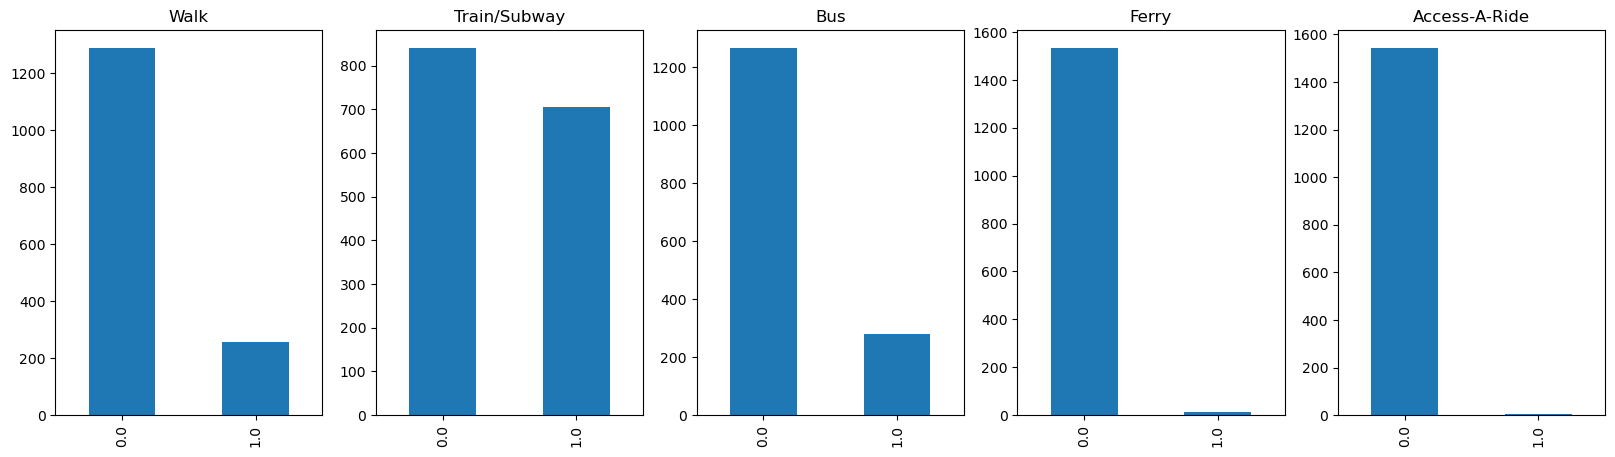

In [5]:
fig, axs = plt.subplots(1, len(alter_col),figsize=(20,5))
idx = 0
for col in alter_col:
    y_enc.loc[:,col].value_counts().plot(kind='bar',ax=axs[idx],title=col)
    idx +=1
fig.savefig('label_obseration.png')

In [6]:
y_multi_enc = y_enc.iloc[:,y_enc.columns.isin(['Walk','Train/Subway','Bus'])]
### Oversampling on walk and bus, keep original record in train/subway
y_multi_enc.head(5)

,Walk,Train/Subway,Bus
0,1.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [8]:

# 按行分组，为每个唯一的行向量分配一个唯一的编号，从1开始
unique_groups = y_multi_enc.groupby(['Walk', 'Train/Subway', 'Bus'], sort=False).ngroup() + 1


# 创建一个字典，存储每种向量和数字的对应关系
vector_mapping = {}

# 遍历唯一的组，将向量和编号添加到字典中
for index, (vector, group) in enumerate(zip(y_multi_enc.drop_duplicates(subset=['Walk', 'Train/Subway', 'Bus']).values, y_multi_enc.groupby(['Walk', 'Train/Subway', 'Bus'], sort=False).ngroup().unique() + 1)):
    vector_mapping[index + 1] = {'vector': tuple(vector), 'number': group}

# 输出每种向量和数字的对应关系
for key, value in vector_mapping.items():
    print(f"Group {key}: {value['vector']} -> {value['number']}")

# 将生成的编号添加到DataFrame中，多分类一共8种情况
y_multi_enc['Group'] = unique_groups

# print(y_multi_enc)

Group 1: (1.0, 1.0, 0.0) -> 1
Group 2: (0.0, 1.0, 0.0) -> 2
Group 3: (0.0, 0.0, 0.0) -> 3
Group 4: (1.0, 0.0, 0.0) -> 4
Group 5: (0.0, 1.0, 1.0) -> 5
Group 6: (0.0, 0.0, 1.0) -> 6
Group 7: (1.0, 1.0, 1.0) -> 7
Group 8: (1.0, 0.0, 1.0) -> 8


In [9]:
#Feature Selection
def select_features(method, k_num, X_train, y_train, X_test):
    fs = SelectKBest(score_func=method, k=k_num) #chi2
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# # feature selection
# X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 8, X_train, y_train, X_test)#chi2
# # what are scores for the features
# cols = X_train.columns.values
# score_dict = {}
# for i in range(len(fs.scores_)):
#     score_dict[cols[i]] = fs.scores_[i]

## Modeling (Binary Classification)

Train (2058, 67) (2058,)
Test (309, 67) (309,)


### Decision Tree

In [123]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:4,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_simple, y_train)
print("The AUC score for this simple model with 4 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1]))

Train (2058, 67) (2058,)
Test (309, 67) (309,)
DecisionTreeClassifier(max_depth=6)
0.6257856929063155
The AUC score for this simple model with 4 features is 0.6513394193355284


In [124]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:4,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_simple, y_train)
print("The AUC score for this simple model with 4 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1]))

Train (1336, 67) (1336,)
Test (309, 67) (309,)
DecisionTreeClassifier(max_depth=3)
0.6992965505551317
The AUC score for this simple model with 4 features is 0.6895499618611747


In [162]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:4,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_simple, y_train)
print("The AUC score for this simple model with 4 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1]))

Train (2004, 67) (2004,)
Test (309, 67) (309,)
DecisionTreeClassifier(max_depth=7)
0.6148950239709042
The AUC score for this simple model with 4 features is 0.6092329310629855


In [131]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
# print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:4,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_simple, y_train)
accuracy = dt.score(X_test_simple, y_test)
print("Accuracy:", accuracy)


Train (3296, 67) (3296,)
Test (309, 67) (309,)
DecisionTreeClassifier(max_depth=1)
Accuracy: 0.44983818770226536


In [15]:
# # This will only work if GraphViz is installed on your machine
# from sklearn import tree
# from IPython.display import Image  
# import pydotplus
# dt = DecisionTreeClassifier(max_depth=3)
# dt.fit(X_train_simple, y_train)
# thestring = tree.export_graphviz(dt, out_file=None,  
#                          feature_names=X_train_simple.columns.values, 
#                          class_names=['walk','no walk'],  
#                          filled=True, rounded=True,  
#                          special_characters=True,impurity=False)
# graph = pydotplus.graph_from_dot_data(thestring)  
# Image(graph.create_png())  

### Random Forest

In [163]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)


param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

rf = RandomForestClassifier(max_leaf_nodes=10, n_estimators=41, n_jobs=-1)
rf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
### No improvement after feature selections
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train_simple, y_train)
pred=rs.predict_proba(X_test_simple)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=44, n_jobs=-1)
0.6643246817655811
RandomForestClassifier(max_leaf_nodes=10, n_estimators=46, n_jobs=-1)
0.6888741940816665


In [133]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)


param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

rf = RandomForestClassifier(max_leaf_nodes=10, n_estimators=41, n_jobs=-1)
rf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
### No improvement after feature selections
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train_simple, y_train)
pred=rs.predict_proba(X_test_simple)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=40, n_jobs=-1)
0.7265040407063754
RandomForestClassifier(max_leaf_nodes=10, n_estimators=50, n_jobs=-1)
0.7068617180484884


In [134]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)


param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

rf = RandomForestClassifier(max_leaf_nodes=10, n_estimators=41, n_jobs=-1)
rf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
### No improvement after feature selections
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train_simple, y_train)
pred=rs.predict_proba(X_test_simple)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=40, n_jobs=-1)
0.7325620815323333
RandomForestClassifier(max_leaf_nodes=10, n_estimators=48, n_jobs=-1)
0.7220315280956013


In [139]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)


param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_estimator_)
# print(roc_auc_score(np.array(y_test),pred))

rf = RandomForestClassifier(max_leaf_nodes=10, n_estimators=41, n_jobs=-1)
rf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

# Let's generate our new training and testing model using the top three features.
### No improvement after feature selections
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

param_grid = {'n_estimators':range(40,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train_simple, y_train)
pred=rs.predict_proba(X_test_simple)[:,1]
print(rs.best_estimator_)
# print(roc_auc_score(np.array(y_test),pred))
Feature_importance.head(5)

RandomForestClassifier(max_leaf_nodes=10, n_estimators=40, n_jobs=-1)
RandomForestClassifier(max_leaf_nodes=10, n_estimators=40, n_jobs=-1)


,variables,importance
0,qAGECODE,0.036395
1,qEDUCATION,0.025679
2,qINCOME,0.051015
3,qTRIPPLANAPP,0.010681
4,gFREIGHT1b_qFREIGHT1_mA,0.021984


## AdaBoosting

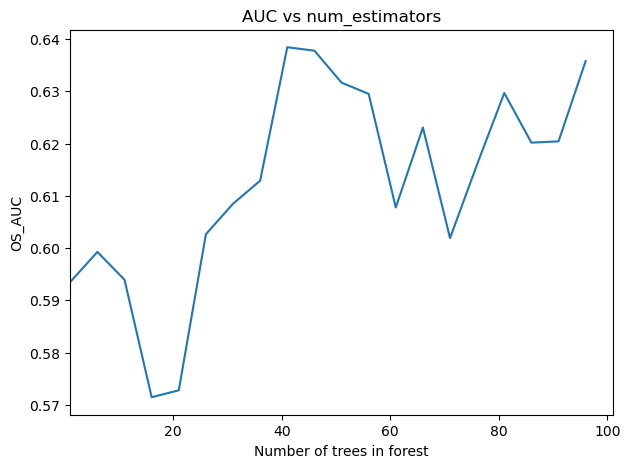

AdaBoostClassifier(n_estimators=61)
0.607786410977021
                                 variables importance
0                                 qAGECODE   0.052083
1                               qEDUCATION   0.041667
2                                  qINCOME    0.03125
3                             qTRIPPLANAPP   0.020833
4                  gFREIGHT1b_qFREIGHT1_mA   0.010417
..                                     ...        ...
62                     qWORKLOCATION_Other   0.010417
63         qWORKLOCATION_Varying job sites   0.010417
64  Welfare_NYCHA Tenant/Section8 Recipent        0.0
65                              Welfare_No        0.0
66       Welfare_Public Assistance/Welfare        0.0

[67 rows x 2 columns]


In [164]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

AUC=[]
for i in range(1,101,5):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,101,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,101)
plt.show()

param_grid = {'n_estimators':range(1,101,5)}
clf = AdaBoostClassifier()
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
ada = gs.fit(X_train, y_train)
pred=ada.predict_proba(X_test)[:,1]
print(ada.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

clf = AdaBoostClassifier(n_estimators=96)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)

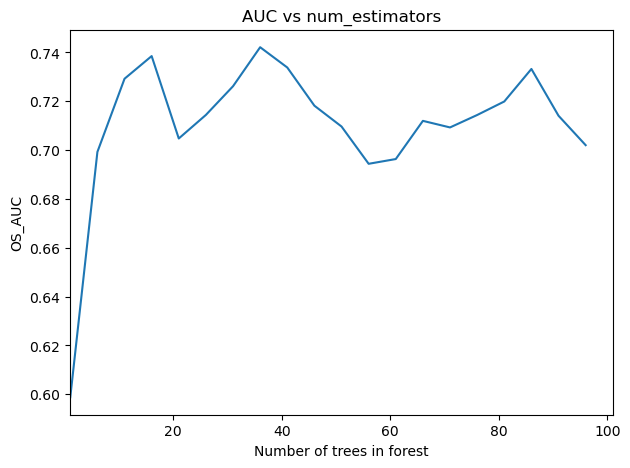

AdaBoostClassifier(n_estimators=71)
0.7092936246632745
                                 variables importance
0                                 qAGECODE   0.020833
1                               qEDUCATION    0.03125
2                                  qINCOME   0.041667
3                             qTRIPPLANAPP   0.052083
4                  gFREIGHT1b_qFREIGHT1_mA   0.020833
..                                     ...        ...
62                     qWORKLOCATION_Other   0.010417
63         qWORKLOCATION_Varying job sites   0.010417
64  Welfare_NYCHA Tenant/Section8 Recipent        0.0
65                              Welfare_No   0.010417
66       Welfare_Public Assistance/Welfare   0.010417

[67 rows x 2 columns]


In [142]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

AUC=[]
for i in range(1,101,5):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,101,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,101)
plt.show()

param_grid = {'n_estimators':range(1,101,5)}
clf = AdaBoostClassifier()
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
ada = gs.fit(X_train, y_train)
pred=ada.predict_proba(X_test)[:,1]
print(ada.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

clf = AdaBoostClassifier(n_estimators=96)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)

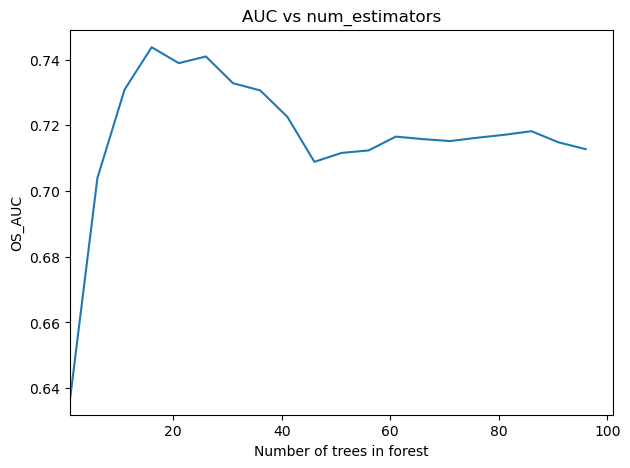

AdaBoostClassifier(n_estimators=11)
0.7308246461564539
                                 variables importance
0                                 qAGECODE    0.03125
1                               qEDUCATION   0.052083
2                                  qINCOME    0.03125
3                             qTRIPPLANAPP   0.020833
4                  gFREIGHT1b_qFREIGHT1_mA   0.041667
..                                     ...        ...
62                     qWORKLOCATION_Other   0.010417
63         qWORKLOCATION_Varying job sites        0.0
64  Welfare_NYCHA Tenant/Section8 Recipent   0.010417
65                              Welfare_No        0.0
66       Welfare_Public Assistance/Welfare   0.010417

[67 rows x 2 columns]


In [143]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

AUC=[]
for i in range(1,101,5):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,101,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,101)
plt.show()

param_grid = {'n_estimators':range(1,101,5)}
clf = AdaBoostClassifier()
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
ada = gs.fit(X_train, y_train)
pred=ada.predict_proba(X_test)[:,1]
print(ada.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

clf = AdaBoostClassifier(n_estimators=96)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)

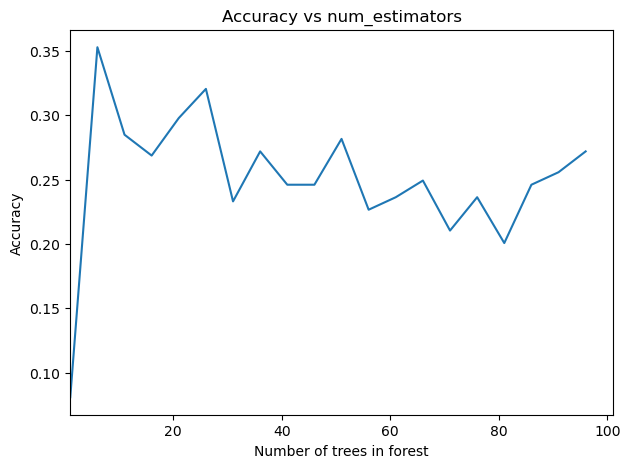

AdaBoostClassifier(n_estimators=16)
0.2686084142394822
                                 variables importance
0                                 qAGECODE     0.0625
1                               qEDUCATION    0.09375
2                                  qINCOME   0.072917
3                             qTRIPPLANAPP   0.052083
4                  gFREIGHT1b_qFREIGHT1_mA    0.03125
..                                     ...        ...
62                     qWORKLOCATION_Other   0.010417
63         qWORKLOCATION_Varying job sites        0.0
64  Welfare_NYCHA Tenant/Section8 Recipent        0.0
65                              Welfare_No        0.0
66       Welfare_Public Assistance/Welfare        0.0

[67 rows x 2 columns]


In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

accuracy=[]
for i in range(1,101,5):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    accuracy.append(accuracy_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,101,5),accuracy)
plt.xlabel("Number of trees in forest")
plt.ylabel("Accuracy")
plt.title("Accuracy vs num_estimators")
plt.xlim(1,101)
plt.show()

param_grid = {'n_estimators':range(1,101,5)}
clf = AdaBoostClassifier()
gs = GridSearchCV(clf,param_grid=param_grid,scoring='accuracy')
ada = gs.fit(X_train, y_train)
pred=ada.predict(X_test)
print(ada.best_estimator_)
print(accuracy_score(np.array(y_test),pred))

clf = AdaBoostClassifier(n_estimators=96)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)


## Gradient Boosting

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=111,
                           random_state=0)
0.6332451644899983


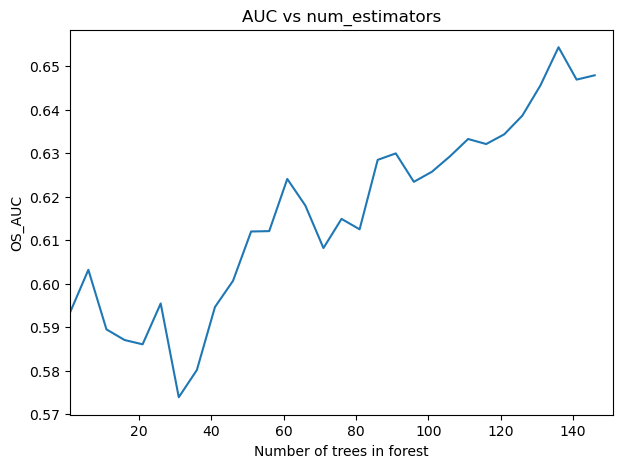

                                 variables importance
0                                 qAGECODE   0.045925
1                               qEDUCATION     0.0326
2                                  qINCOME   0.002684
3                             qTRIPPLANAPP   0.020144
4                  gFREIGHT1b_qFREIGHT1_mA   0.005524
..                                     ...        ...
62                     qWORKLOCATION_Other   0.003504
63         qWORKLOCATION_Varying job sites   0.011862
64  Welfare_NYCHA Tenant/Section8 Recipent        0.0
65                              Welfare_No    0.00041
66       Welfare_Public Assistance/Welfare   0.000642

[67 rows x 2 columns]


In [165]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

param_grid = {'n_estimators':range(1,151,5)}
clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
gb = gs.fit(X_train, y_train)
pred=gb.predict_proba(X_test)[:,1]
print(gb.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

AUC=[]
for i in range(1,151,5):
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,151,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,151)
plt.show()

clf = GradientBoostingClassifier(n_estimators=106, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=136,
                           random_state=0)
0.6549685722837474


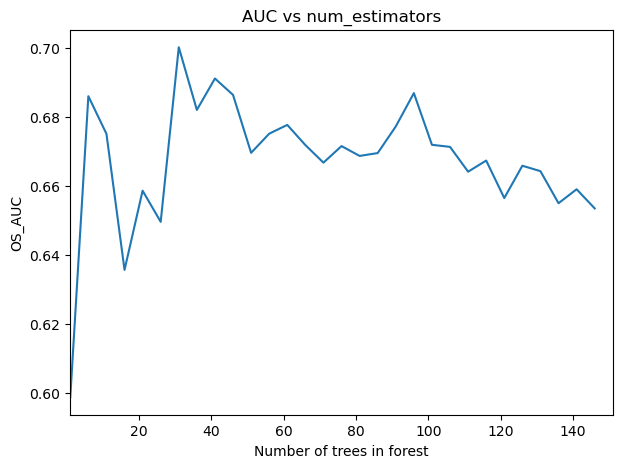

                                 variables importance
0                                 qAGECODE   0.001357
1                               qEDUCATION   0.007528
2                                  qINCOME   0.003953
3                             qTRIPPLANAPP   0.032594
4                  gFREIGHT1b_qFREIGHT1_mA   0.001009
..                                     ...        ...
62                     qWORKLOCATION_Other   0.004077
63         qWORKLOCATION_Varying job sites   0.010759
64  Welfare_NYCHA Tenant/Section8 Recipent        0.0
65                              Welfare_No   0.001601
66       Welfare_Public Assistance/Welfare   0.001607

[67 rows x 2 columns]


In [151]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

param_grid = {'n_estimators':range(1,151,5)}
clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
gb = gs.fit(X_train, y_train)
pred=gb.predict_proba(X_test)[:,1]
print(gb.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

AUC=[]
for i in range(1,151,5):
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,151,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,151)
plt.show()

clf = GradientBoostingClassifier(n_estimators=106, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=6,
                           random_state=0)
0.70364013899483


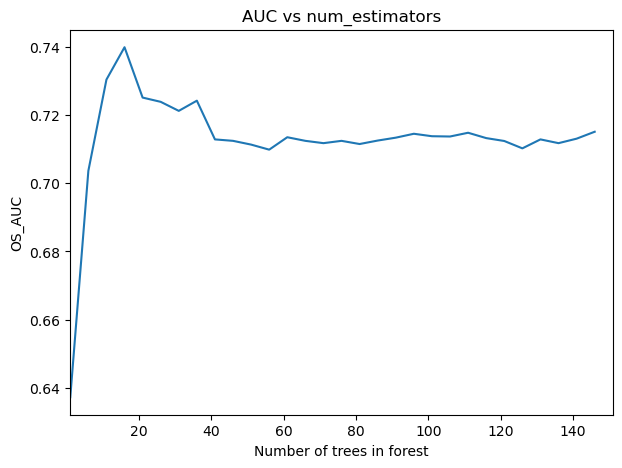

                                 variables importance
0                                 qAGECODE   0.008461
1                               qEDUCATION   0.025582
2                                  qINCOME   0.017044
3                             qTRIPPLANAPP   0.078175
4                  gFREIGHT1b_qFREIGHT1_mA   0.018166
..                                     ...        ...
62                     qWORKLOCATION_Other   0.017367
63         qWORKLOCATION_Varying job sites        0.0
64  Welfare_NYCHA Tenant/Section8 Recipent   0.005466
65                              Welfare_No        0.0
66       Welfare_Public Assistance/Welfare   0.001912

[67 rows x 2 columns]


In [152]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

param_grid = {'n_estimators':range(1,151,5)}
clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
gb = gs.fit(X_train, y_train)
pred=gb.predict_proba(X_test)[:,1]
print(gb.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

AUC=[]
for i in range(1,151,5):
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,151,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,151)
plt.show()


clf = GradientBoostingClassifier(n_estimators=106, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
print(Feature_importance)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=116,
                           random_state=0)
0.42718446601941745


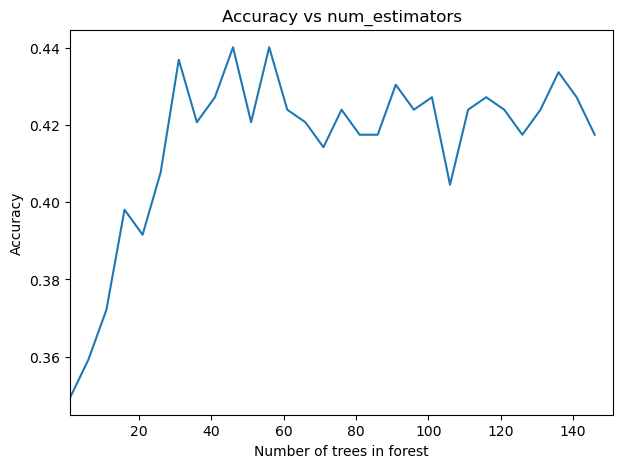

                                 variables importance
0                                 qAGECODE   0.023758
1                               qEDUCATION   0.038024
2                                  qINCOME   0.047475
3                             qTRIPPLANAPP   0.033654
4                  gFREIGHT1b_qFREIGHT1_mA   0.013423
..                                     ...        ...
62                     qWORKLOCATION_Other   0.002043
63         qWORKLOCATION_Varying job sites   0.012857
64  Welfare_NYCHA Tenant/Section8 Recipent    0.00067
65                              Welfare_No   0.000786
66       Welfare_Public Assistance/Welfare   0.000551

[67 rows x 2 columns]


In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

param_grid = {'n_estimators':range(1,151,5)}
clf = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
gs = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy')
gb = gs.fit(X_train, y_train)
pred = gb.predict(X_test)
print(gb.best_estimator_)
print(accuracy_score(np.array(y_test), pred))

accuracy = []
for i in range(1, 151, 5):
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy.append(accuracy_score(np.array(y_test), pred))

plt.figure(figsize=(7, 5))
plt.plot(range(1, 151, 5), accuracy)
plt.xlabel("Number of trees in forest")
plt.ylabel("Accuracy")
plt.title("Accuracy vs num_estimators")
plt.xlim(1, 151)
plt.show()

clf = GradientBoostingClassifier(n_estimators=106, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

Feature_importance = pd.DataFrame([list(X_train.columns), list(clf.feature_importances_)]).T
Feature_importance.columns = ["variables", "importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance", ascending=False).iloc[:5, :]
print(Feature_importance)


## Naive Bayes

In [166]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(chi2, 6, X_train, y_train, X_test)#chi2/mutual_info_classif

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train,y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7909181636726547
Out of sample prediction accuracy: 0.7411003236245954


In [156]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(chi2, 6, X_train, y_train, X_test)#chi2/mutual_info_classif

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train,y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.8294460641399417
Out of sample prediction accuracy: 0.7637540453074434


In [155]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(chi2, 6, X_train, y_train, X_test)#chi2/mutual_info_classif

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train,y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7118263473053892
Out of sample prediction accuracy: 0.6699029126213593


In [157]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(chi2, 6, X_train, y_train, X_test)#chi2/mutual_info_classif

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train,y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.003033980582524272
Out of sample prediction accuracy: 0.006472491909385114


## Bayes Nets

In [167]:
### do we need feature selection before bayes nets
# !pip install pgmpy
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 5, X_train, y_train, X_test)#chi2/mutual_info_classif
# what are scores for the features
cols = X_train.columns.values
score_dict = {}
for i in range(len(fs.scores_)):
    score_dict[cols[i]] = fs.scores_[i]
top_attr = sorted(score_dict.items(), key=lambda x: x[1],reverse=True)[:7]
top_attr = [i[0] for i in top_attr]
train,test=train_test_split(pd.concat([X_enc[top_attr],y_enc['Walk']],axis=1),random_state=999,test_size=0.2)


hc = HillClimbSearch(train)
best_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges()) # convert DAG to BayesianModel
print(best_model.edges())

best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('qINCOME', 'qEDUCATION'), ('qAUTOVEHICLEFAM', 'qAUTOVEHICLEWILL'), ('qAUTOVEHICLEWILL', 'qAUTOVEHICLESAFE')]
CPD of qINCOME:
+--------------+-----------+
| qINCOME(0.0) | 0.0458199 |
+--------------+-----------+
| qINCOME(1.0) | 0.073955  |
+--------------+-----------+
| qINCOME(2.0) | 0.0884244 |
+--------------+-----------+
| qINCOME(3.0) | 0.131833  |
+--------------+-----------+
| qINCOME(4.0) | 0.177653  |
+--------------+-----------+
| qINCOME(5.0) | 0.165595  |
+--------------+-----------+
| qINCOME(6.0) | 0.167203  |
+--------------+-----------+
| qINCOME(7.0) | 0.0675241 |
+--------------+-----------+
| qINCOME(8.0) | 0.0819936 |
+--------------+-----------+
CPD of qEDUCATION:
+-----------------+----------------------+-----+----------------------+----------------------+
| qINCOME         | qINCOME(0.0)         | ... | qINCOME(7.0)         | qINCOME(8.0)         |
+-----------------+----------------------+-----+----------------------+----------------------+
| qEDUCATION(0.0) 

In [158]:
### do we need feature selection before bayes nets
# !pip install pgmpy
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 5, X_train, y_train, X_test)#chi2/mutual_info_classif
# what are scores for the features
cols = X_train.columns.values
score_dict = {}
for i in range(len(fs.scores_)):
    score_dict[cols[i]] = fs.scores_[i]
top_attr = sorted(score_dict.items(), key=lambda x: x[1],reverse=True)[:7]
top_attr = [i[0] for i in top_attr]
train,test=train_test_split(pd.concat([X_enc[top_attr],y_enc['Walk']],axis=1),random_state=999,test_size=0.2)


hc = HillClimbSearch(train)
best_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges()) # convert DAG to BayesianModel
print(best_model.edges())

best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('qINCOME', 'qEDUCATION')]
CPD of qINCOME:
+--------------+-----------+
| qINCOME(0.0) | 0.0458199 |
+--------------+-----------+
| qINCOME(1.0) | 0.073955  |
+--------------+-----------+
| qINCOME(2.0) | 0.0884244 |
+--------------+-----------+
| qINCOME(3.0) | 0.131833  |
+--------------+-----------+
| qINCOME(4.0) | 0.177653  |
+--------------+-----------+
| qINCOME(5.0) | 0.165595  |
+--------------+-----------+
| qINCOME(6.0) | 0.167203  |
+--------------+-----------+
| qINCOME(7.0) | 0.0675241 |
+--------------+-----------+
| qINCOME(8.0) | 0.0819936 |
+--------------+-----------+
CPD of qEDUCATION:
+-----------------+----------------------+-----+----------------------+----------------------+
| qINCOME         | qINCOME(0.0)         | ... | qINCOME(7.0)         | qINCOME(8.0)         |
+-----------------+----------------------+-----+----------------------+----------------------+
| qEDUCATION(0.0) | 0.031746031746031744 | ... | 0.011111111111111112 | 0.009259259259259259 |
+-----

In [160]:
### do we need feature selection before bayes nets
# !pip install pgmpy
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 5, X_train, y_train, X_test)#chi2/mutual_info_classif
# what are scores for the features
cols = X_train.columns.values
score_dict = {}
for i in range(len(fs.scores_)):
    score_dict[cols[i]] = fs.scores_[i]
top_attr = sorted(score_dict.items(), key=lambda x: x[1],reverse=True)[:7]
top_attr = [i[0] for i in top_attr]
train,test=train_test_split(pd.concat([X_enc[top_attr],y_enc['Walk']],axis=1),random_state=999,test_size=0.2)


hc = HillClimbSearch(train)
best_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges()) # convert DAG to BayesianModel
print(best_model.edges())

best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('qCARACCESS', 'Walk'), ('qCARACCESS', 'qINDUSTRY_Transportation and Utilities'), ('qCARACCESS', 'qWORKFH'), ('qCARACCESS', 'qCITIBIKE'), ('Walk', 'qCITIBIKE'), ('qINDUSTRY_Transportation and Utilities', 'qWORKLOCATION_Other'), ('qWORKFH', 'Walk'), ('qBUILDINGb', 'qCARACCESS'), ('qWORKLOCATION_Other', 'qWORKFH')]
CPD of qCARACCESS:
+-----------------+--------------------+-----+--------------------+--------------------+
| qBUILDINGb      | qBUILDINGb(0.0)    | ... | qBUILDINGb(3.0)    | qBUILDINGb(4.0)    |
+-----------------+--------------------+-----+--------------------+--------------------+
| qCARACCESS(0.0) | 0.4751131221719457 | ... | 0.7360406091370558 | 0.8785425101214575 |
+-----------------+--------------------+-----+--------------------+--------------------+
| qCARACCESS(1.0) | 0.5248868778280543 | ... | 0.2639593908629442 | 0.1214574898785425 |
+-----------------+--------------------+-----+--------------------+--------------------+
CPD of Walk:
+------------+---------------

In [161]:
### do we need feature selection before bayes nets
# !pip install pgmpy
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 5, X_train, y_train, X_test)#chi2/mutual_info_classif
# what are scores for the features
cols = X_train.columns.values
score_dict = {}
for i in range(len(fs.scores_)):
    score_dict[cols[i]] = fs.scores_[i]
top_attr = sorted(score_dict.items(), key=lambda x: x[1],reverse=True)[:7]
top_attr = [i[0] for i in top_attr]
train,test=train_test_split(pd.concat([X_enc[top_attr],y_enc['Walk']],axis=1),random_state=999,test_size=0.2)


hc = HillClimbSearch(train)
best_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges()) # convert DAG to BayesianModel
print(best_model.edges())

best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('qWORKFH', 'Walk'), ('qWORKFH', 'qAUTOVEHICLESAFE'), ('qINCOME', 'qEDUCATION'), ('qEDUCATION', 'qWORKFH')]
CPD of qWORKFH:
+--------------+---------------------+-----+--------------------+---------------------+
| qEDUCATION   | qEDUCATION(0.0)     | ... | qEDUCATION(5.0)    | qEDUCATION(6.0)     |
+--------------+---------------------+-----+--------------------+---------------------+
| qWORKFH(0.0) | 0.8333333333333334  | ... | 0.6440281030444965 | 0.6568265682656826  |
+--------------+---------------------+-----+--------------------+---------------------+
| qWORKFH(1.0) | 0.16666666666666666 | ... | 0.3559718969555035 | 0.34317343173431736 |
+--------------+---------------------+-----+--------------------+---------------------+
CPD of Walk:
+-----------+---------------------+---------------------+
| qWORKFH   | qWORKFH(0.0)        | qWORKFH(1.0)        |
+-----------+---------------------+---------------------+
| Walk(0.0) | 0.8797814207650273  | 0.6820987654320988  |
+-----------+-

In [37]:
# best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
# col = ['gFREIGHT1b_qFREIGHT1_mA','gFREIGHT1b_qFREIGHT4_mA','qWORKFH','qAUTOVEHICLESAFE','qAUTOVEHICLEFAM']
# train_x = train.loc[:,train.columns.isin(col)]
# predicted_train = best_model.predict(train_x)
# print("In sample:",(train.loc[:,'Walk'].reset_index(drop=True)==predicted_train['Walk']).mean())

# test_x = test.loc[:,test.columns.isin(col)]
# predicted_test = best_model.predict(test_x)
# print("Out of sample:",(test.loc[:,'Walk'].reset_index(drop=True)==predicted_test['Walk']).mean())

# Xgboost二分类

### Train/Subway二分类

Train (2004, 67) (2004,)
Test (309, 67) (309,)
Best hyperparameters: {'max_depth': 3}
Top 5 Features: Index(['qLICENSE', 'qGENDER', 'qWORKFH', 'qRACECODE_Hispanic',
       'qRACECODE_White, Non-Hispanic'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

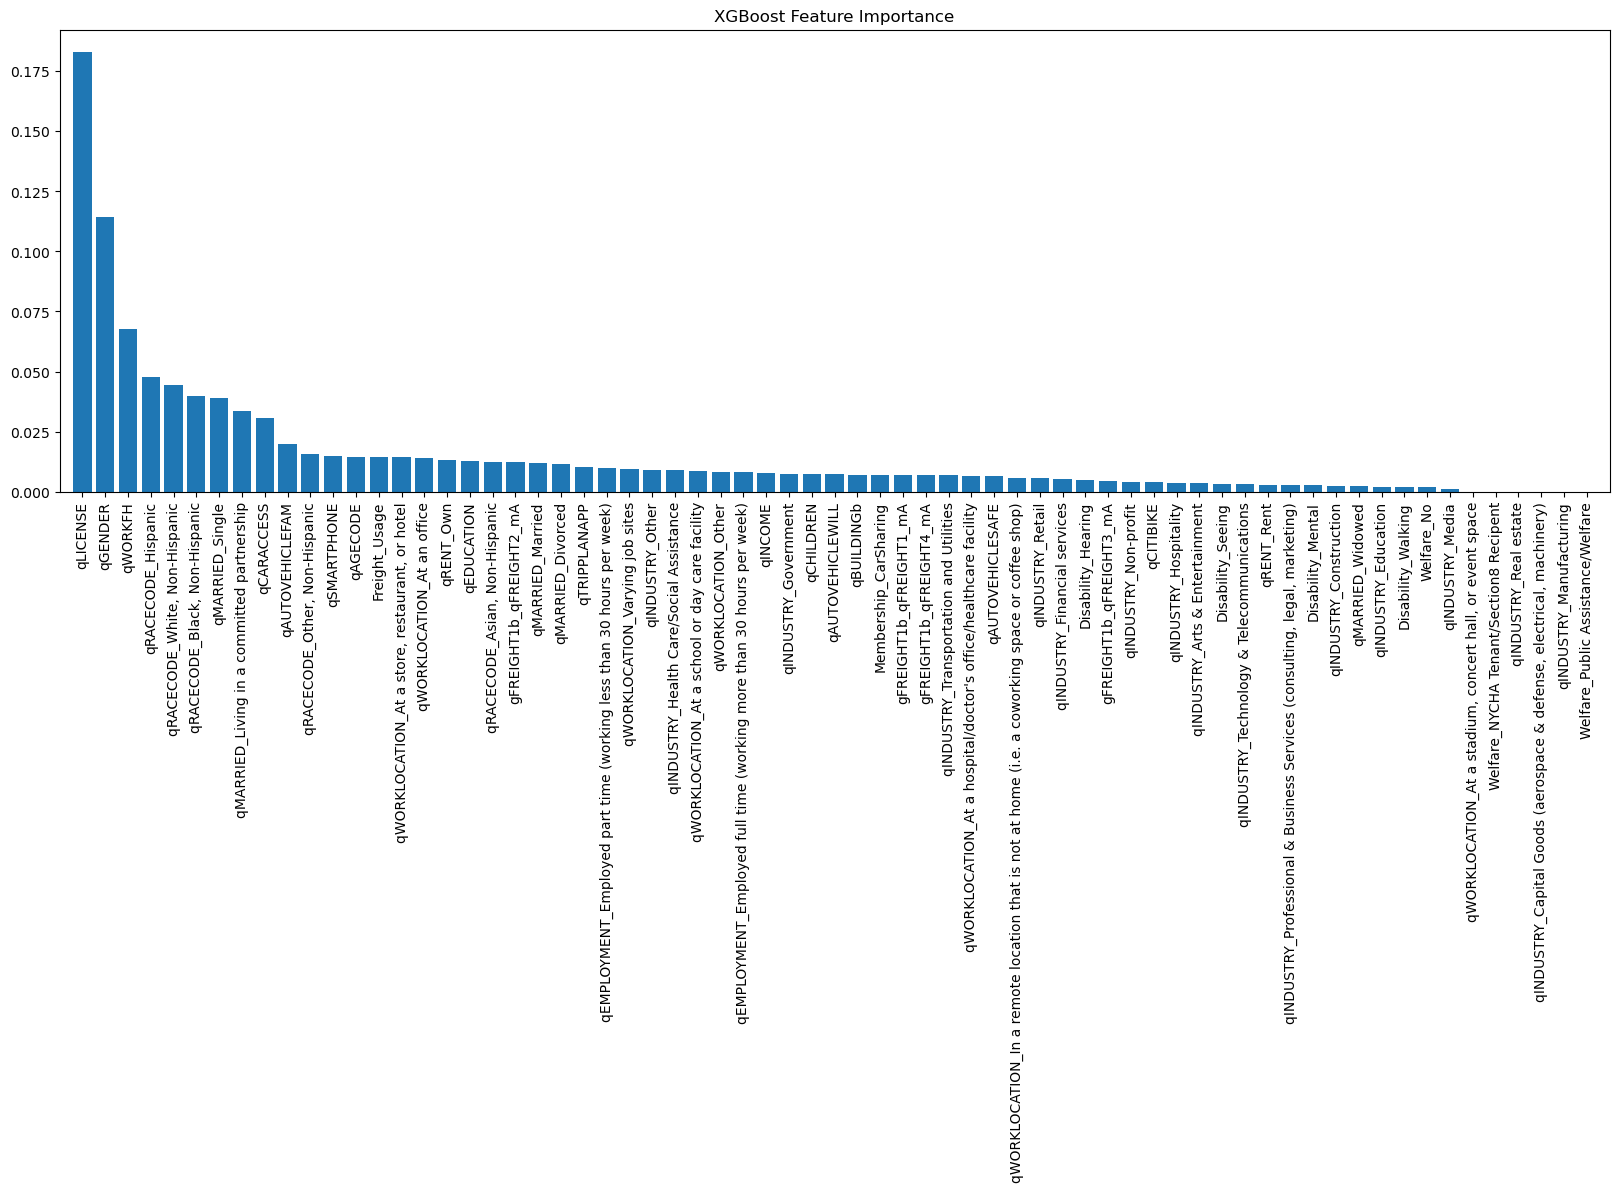

Accuracy: 0.8317152103559871


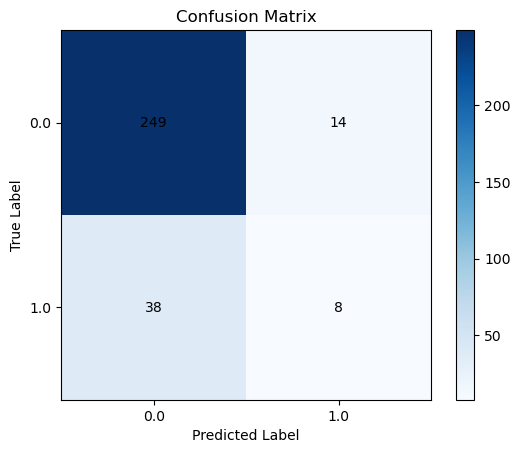

In [168]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

import numpy as np
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# define XGBoost classifier with default hyperparameters
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1)

# define parameter grid for Grid Search
# param_grid = {'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [3, 4, 5, 6],
#               'n_estimators': [100, 200, 300]}

param_grid = {
              'max_depth': [3, 4, 5, 6],
              }

# define Grid Search object with cross-validation of 5 folds
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# fit Grid Search object on training data
grid_search.fit(X_train, y_train)

# get the best estimator found by Grid Search
best_xgb = grid_search.best_estimator_

# print the best hyperparameters found by Grid Search
print('Best hyperparameters:', grid_search.best_params_)

# XGBoost feature importance
xgb_importance = best_xgb.feature_importances_

# get the sorted index of feature importance
xgb_importance_rank = np.argsort(xgb_importance)[::-1]

# print feature names and importance values sorted by feature importance
for i in xgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], xgb_importance[i]))

# print the top 5 important features
top_features = X_train.columns[xgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot XGBoost feature importance
plt.figure()
plt.figure(figsize=(20, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(X_train.shape[1]), xgb_importance[xgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[xgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# predict on test data using the best XGBoost estimator
y_pred = best_xgb.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# add labels to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Train (1336, 67) (1336,)
Test (309, 67) (309,)
Best hyperparameters: {'max_depth': 3}
Top 5 Features: Index(['qCARACCESS', 'qWORKFH', 'qWORKLOCATION_At an office',
       'qWORKLOCATION_At a school or day care facility', 'qTRIPPLANAPP'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

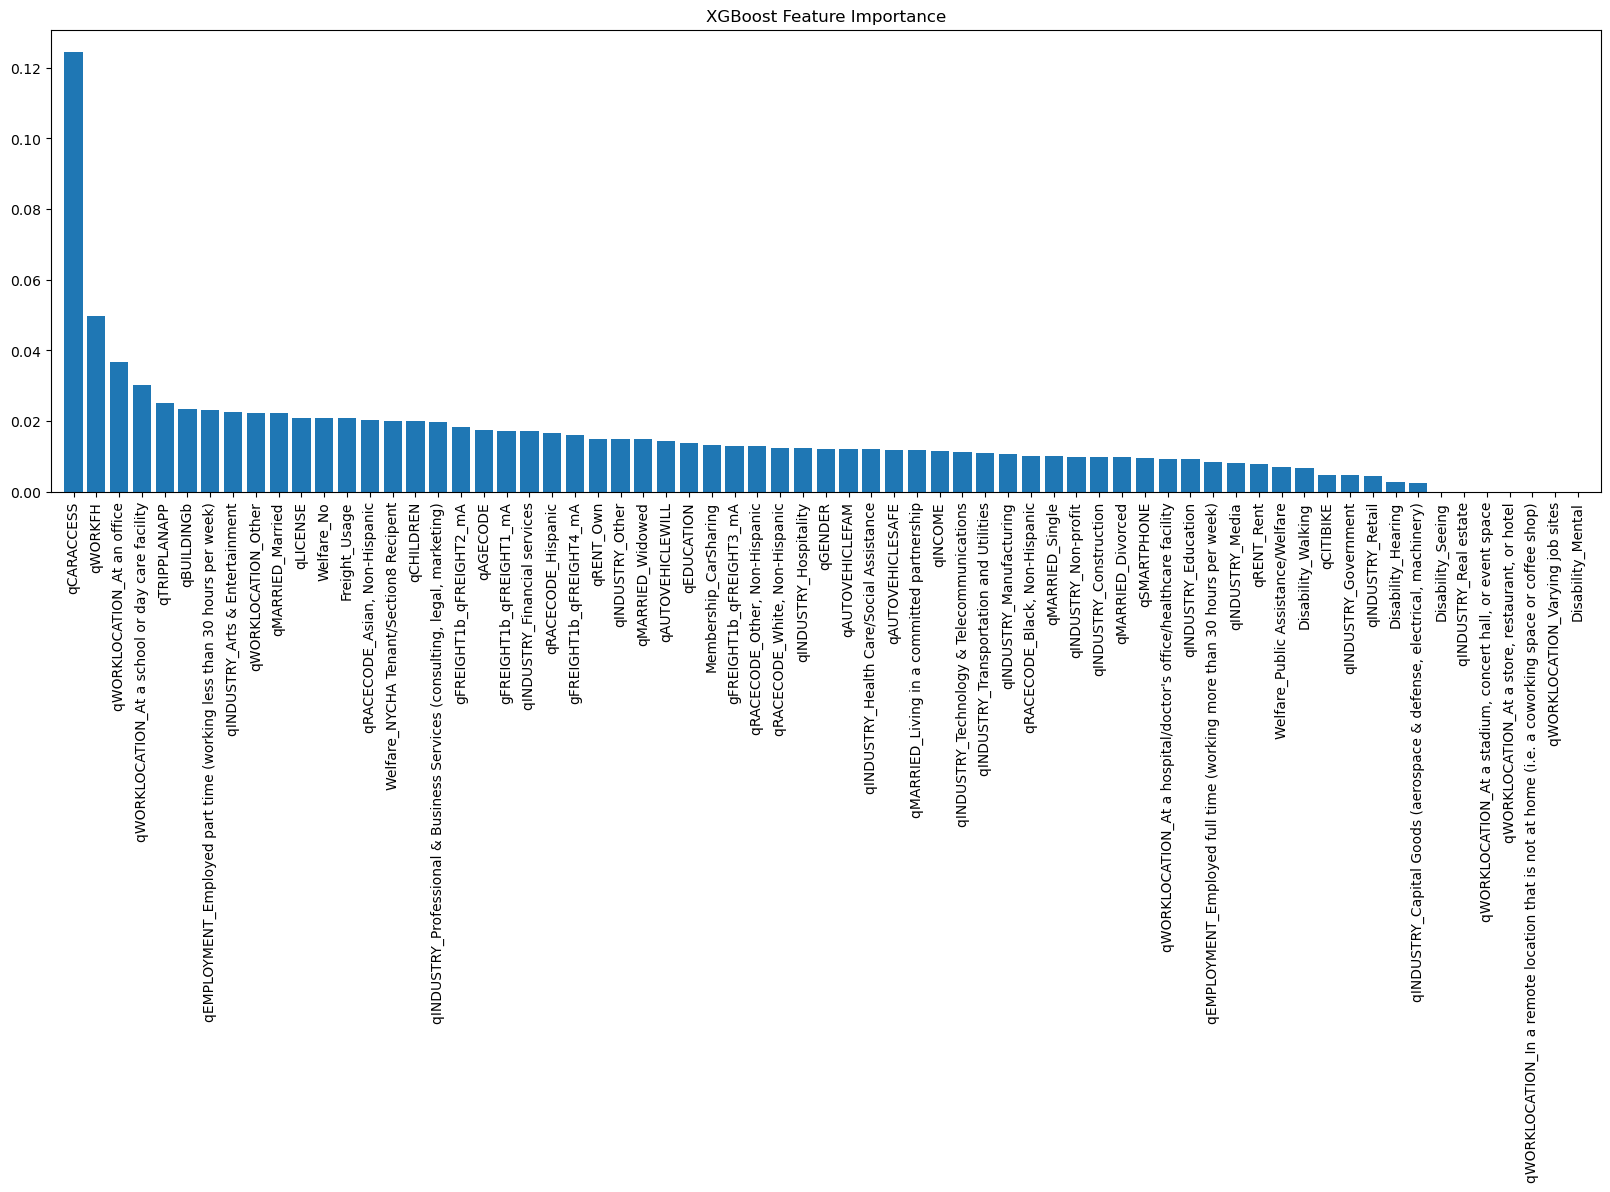

Accuracy: 0.6343042071197411


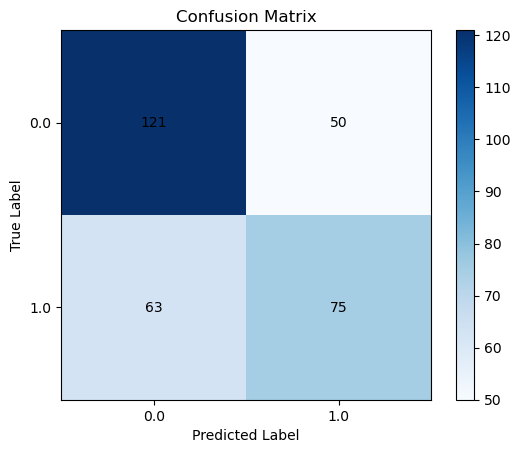

In [110]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

import numpy as np
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# define XGBoost classifier with default hyperparameters
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1)

# define parameter grid for Grid Search
# param_grid = {'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [3, 4, 5, 6],
#               'n_estimators': [100, 200, 300]}

param_grid = {
              'max_depth': [3, 4, 5, 6],
              }

# define Grid Search object with cross-validation of 5 folds
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# fit Grid Search object on training data
grid_search.fit(X_train, y_train)

# get the best estimator found by Grid Search
best_xgb = grid_search.best_estimator_

# print the best hyperparameters found by Grid Search
print('Best hyperparameters:', grid_search.best_params_)

# XGBoost feature importance
xgb_importance = best_xgb.feature_importances_

# get the sorted index of feature importance
xgb_importance_rank = np.argsort(xgb_importance)[::-1]

# print feature names and importance values sorted by feature importance
for i in xgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], xgb_importance[i]))

# print the top 5 important features
top_features = X_train.columns[xgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot XGBoost feature importance
plt.figure()
plt.figure(figsize=(20, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(X_train.shape[1]), xgb_importance[xgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[xgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# predict on test data using the best XGBoost estimator
y_pred = best_xgb.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# add labels to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Walk二分类

Train (2058, 67) (2058,)
Test (309, 67) (309,)
Best hyperparameters: {'max_depth': 6}
Top 5 Features: Index(['qWORKFH', 'qRACECODE_Other, Non-Hispanic',
       'qRACECODE_Black, Non-Hispanic', 'qCARACCESS', 'qCITIBIKE'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

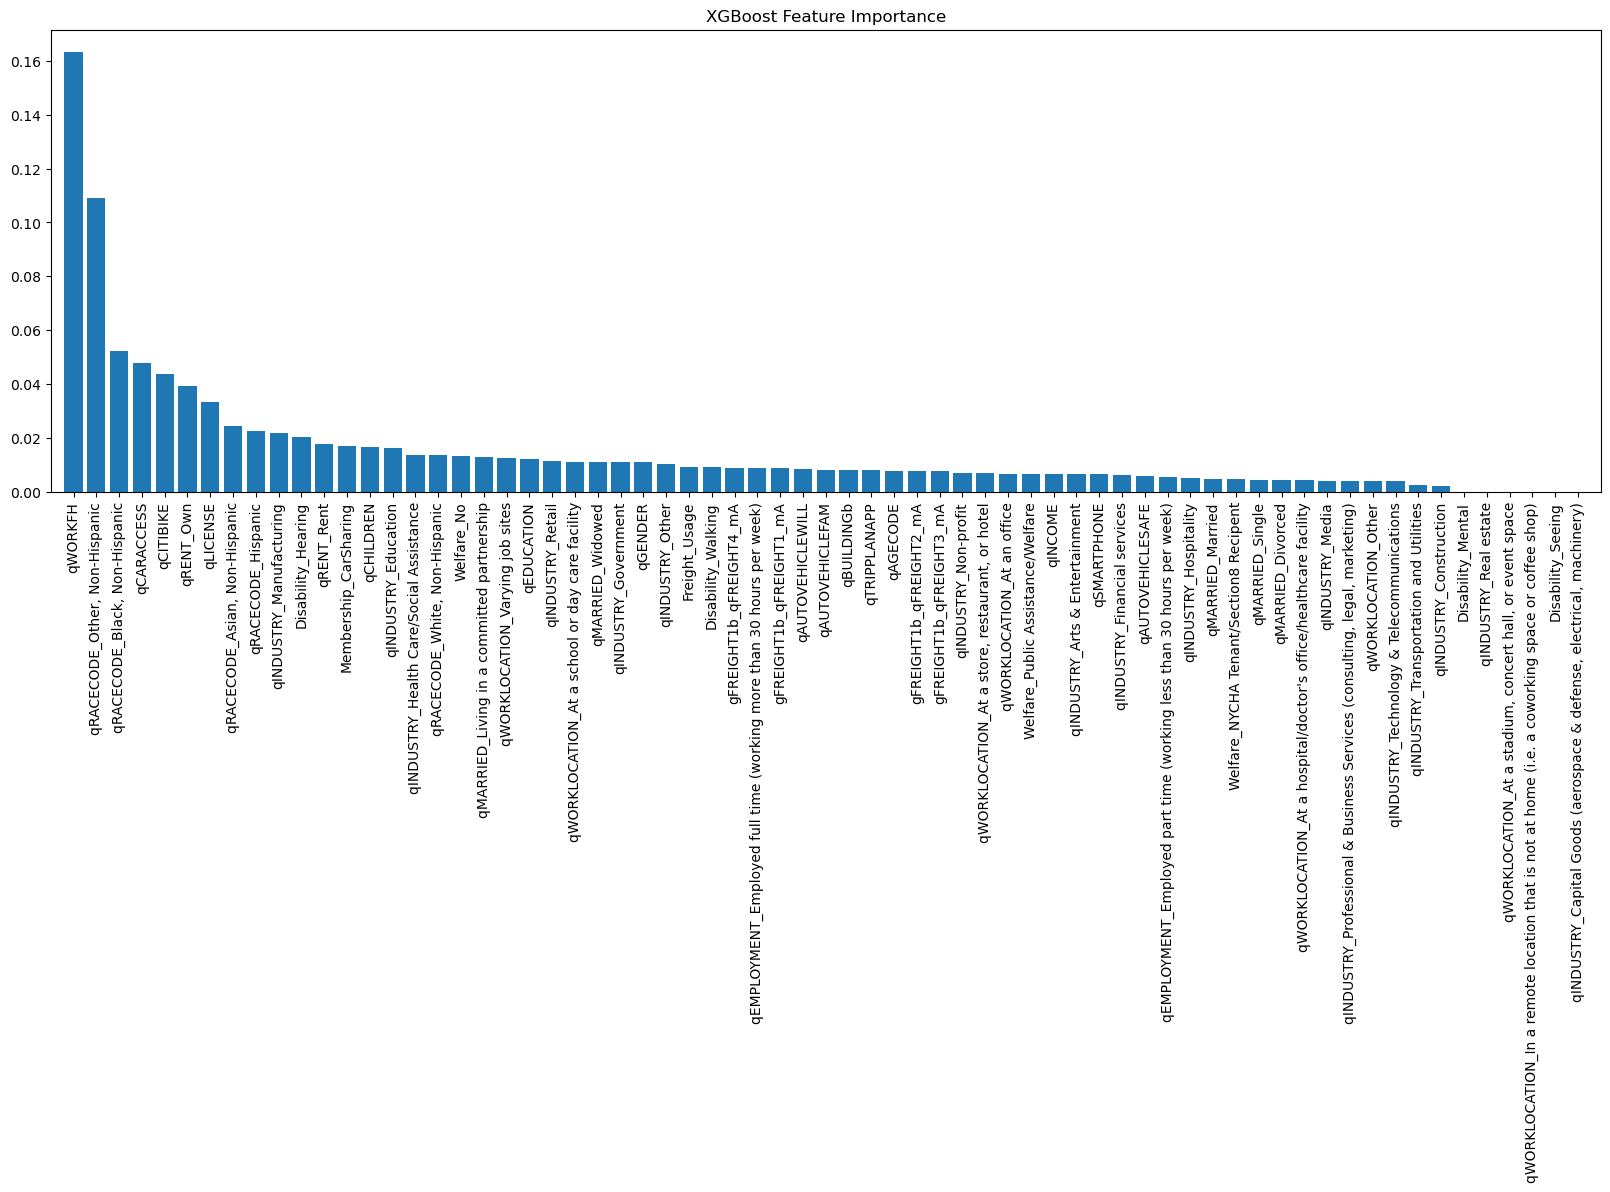

Accuracy: 0.8187702265372169


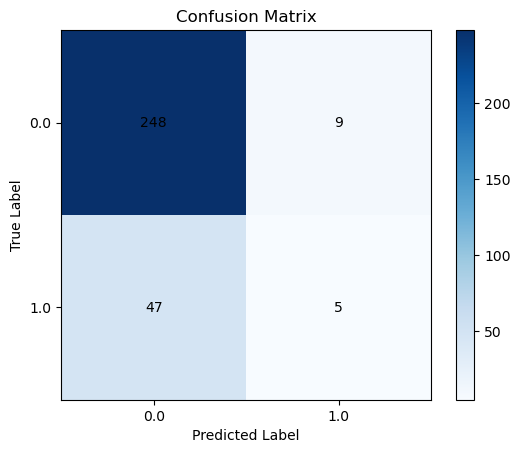

In [111]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

import numpy as np
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# define XGBoost classifier with default hyperparameters
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=1)

# define parameter grid for Grid Search
# param_grid = {'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [3, 4, 5, 6],
#               'n_estimators': [100, 200, 300]}

param_grid = {
              'max_depth': [3, 4, 5, 6],
              }

# define Grid Search object with cross-validation of 5 folds
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# fit Grid Search object on training data
grid_search.fit(X_train, y_train)

# get the best estimator found by Grid Search
best_xgb = grid_search.best_estimator_

# print the best hyperparameters found by Grid Search
print('Best hyperparameters:', grid_search.best_params_)

# XGBoost feature importance
xgb_importance = best_xgb.feature_importances_

# get the sorted index of feature importance
xgb_importance_rank = np.argsort(xgb_importance)[::-1]

# print feature names and importance values sorted by feature importance
for i in xgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], xgb_importance[i]))

# print the top 5 important features
top_features = X_train.columns[xgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot XGBoost feature importance
plt.figure()
plt.figure(figsize=(20, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(X_train.shape[1]), xgb_importance[xgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[xgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# predict on test data using the best XGBoost estimator
y_pred = best_xgb.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# add labels to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Lightgbm二分类

### Train/Subway二分类

Train (2044, 67) (2044,)
Test (309, 67) (309,)
Best hyperparameters: {'num_leaves': 15}
Top 5 Features: Index(['qEDUCATION', 'qAGECODE', 'qINCOME', 'qTRIPPLANAPP', 'qBUILDINGb'], dtype='object')


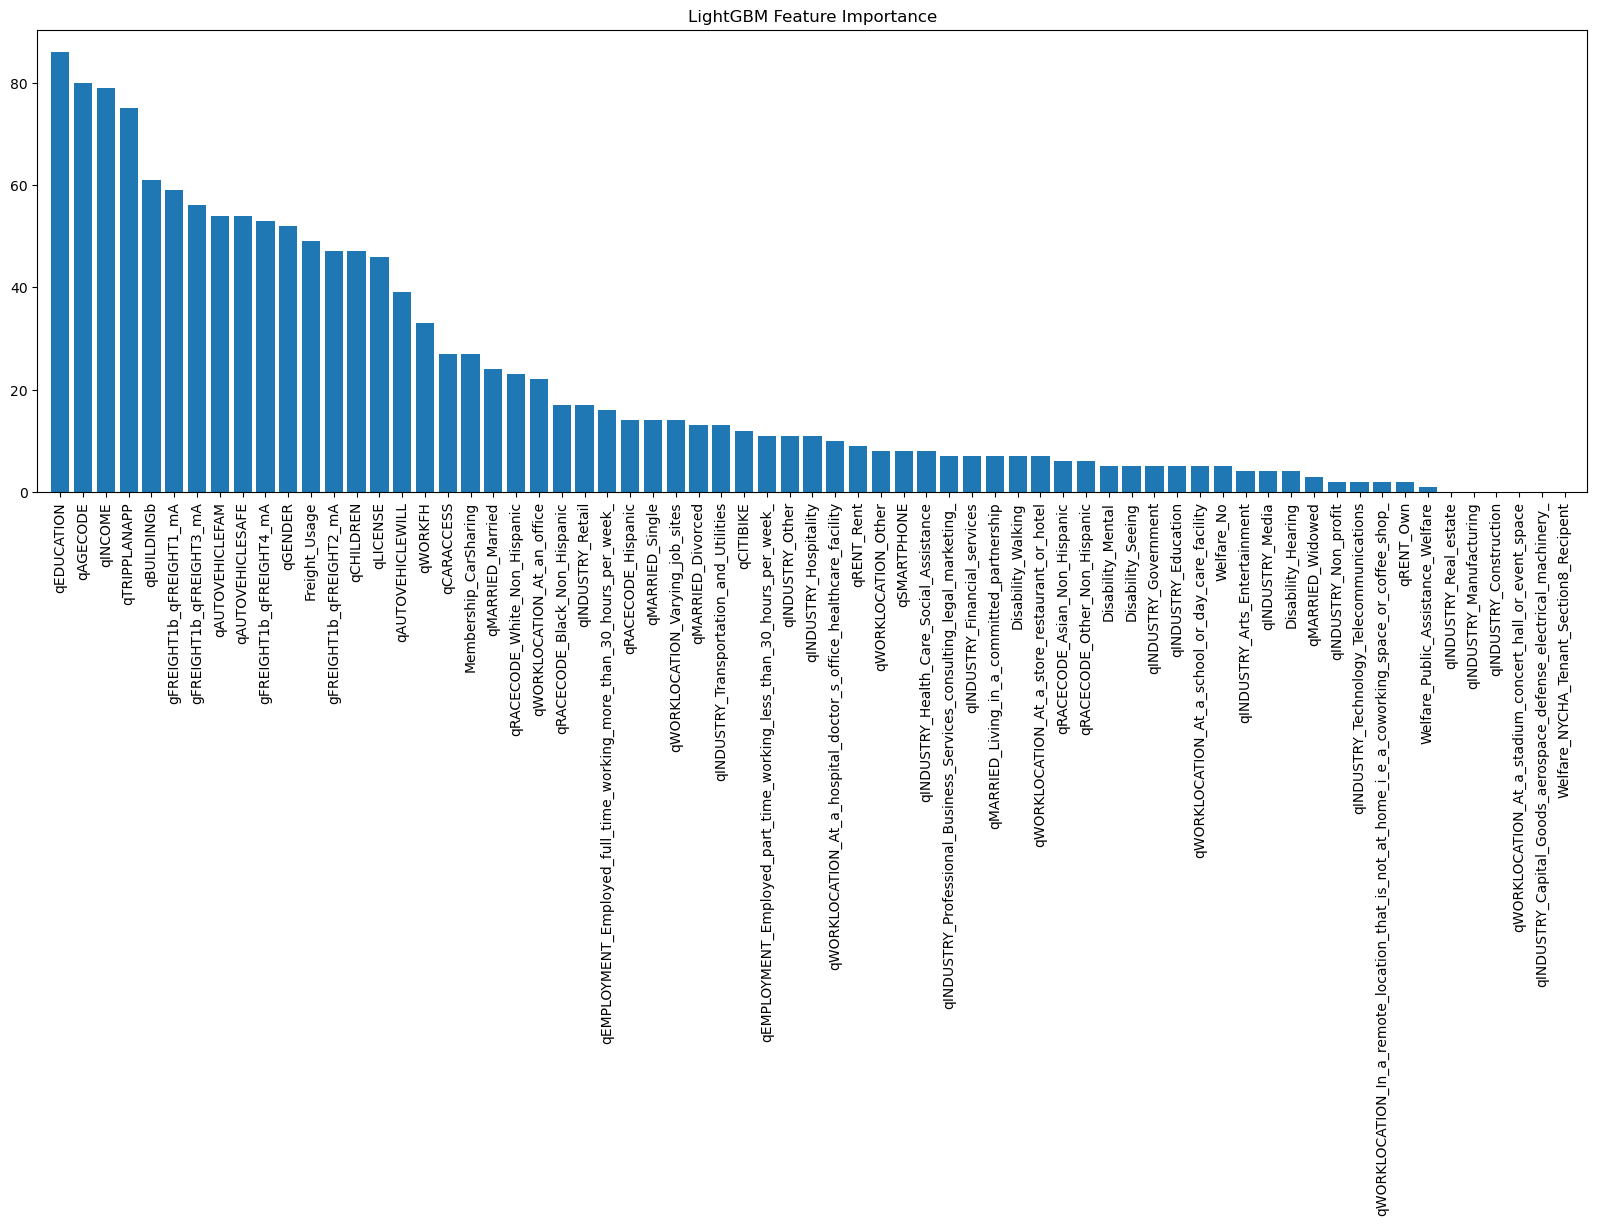

Accuracy: 0.7961165048543689


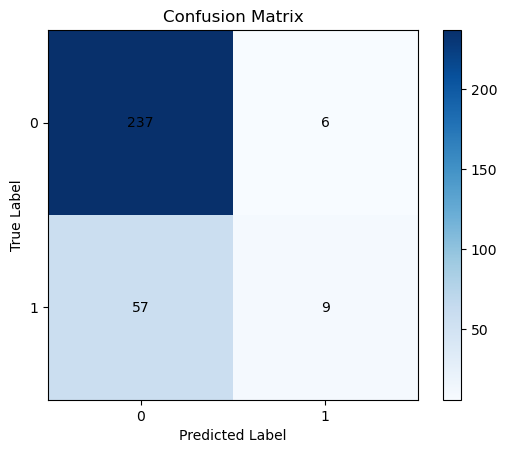

In [169]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Bus'].astype(int), test_size=0.2, random_state=1,stratify=y_multi_enc['Walk'])

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# replace special characters in feature names with underscores
def clean_feature_names(feature_names):
    # regular expression to match non-alphanumeric characters and underscores
    pattern = r'[^\w_]+'
    # remove special characters and keep only alphanumeric characters and underscores in feature names
    clean_names = [re.sub(pattern, '_', name) for name in feature_names]
    return clean_names

# use clean_feature_names function to clean feature names
new_feature_names = clean_feature_names(X_train.columns)

# replace original feature names with new feature names
X_train.columns = new_feature_names
X_test.columns = new_feature_names

# LightGBM classification
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1, random_state=1)

# define parameter grid for grid search
# param_grid = {
#     'num_leaves': [15, 31, 63],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200]
# }

param_grid = {
    'num_leaves': [15, 31, 63]
}

# define grid search object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1)

# fit grid search to training data
grid_search.fit(X_train, y_train)

# print best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)

# fit LightGBM model with best hyperparameters found by grid search
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1, random_state=1, **grid_search.best_params_)
lgb_model.fit(X_train, y_train)

# LightGBM feature importance
lgb_importance = lgb_model.feature_importances_

# get indices of feature importance sorted in descending order
lgb_importance_rank = np.argsort(lgb_importance)[::-1]

# print feature names and feature importance values sorted by feature importance
for i in lgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], lgb_importance[i]))

# print top 5 features by importance
top_features = X_train.columns[lgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot LightGBM feature importance in descending order
plt.figure(figsize=(20, 6))
plt.title("LightGBM Feature Importance")
plt.bar(range(X_train.shape[1]), lgb_importance[lgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[lgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix

# predict on test set
y_pred = lgb_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# 在每个单元格中添加标签
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Train (1342, 67) (1342,)
Test (309, 67) (309,)
Best hyperparameters: {'num_leaves': 15}
Top 5 Features: Index(['qTRIPPLANAPP', 'qBUILDINGb', 'qAGECODE', 'qINCOME',
       'qAUTOVEHICLEWILL'],
      dtype='object')


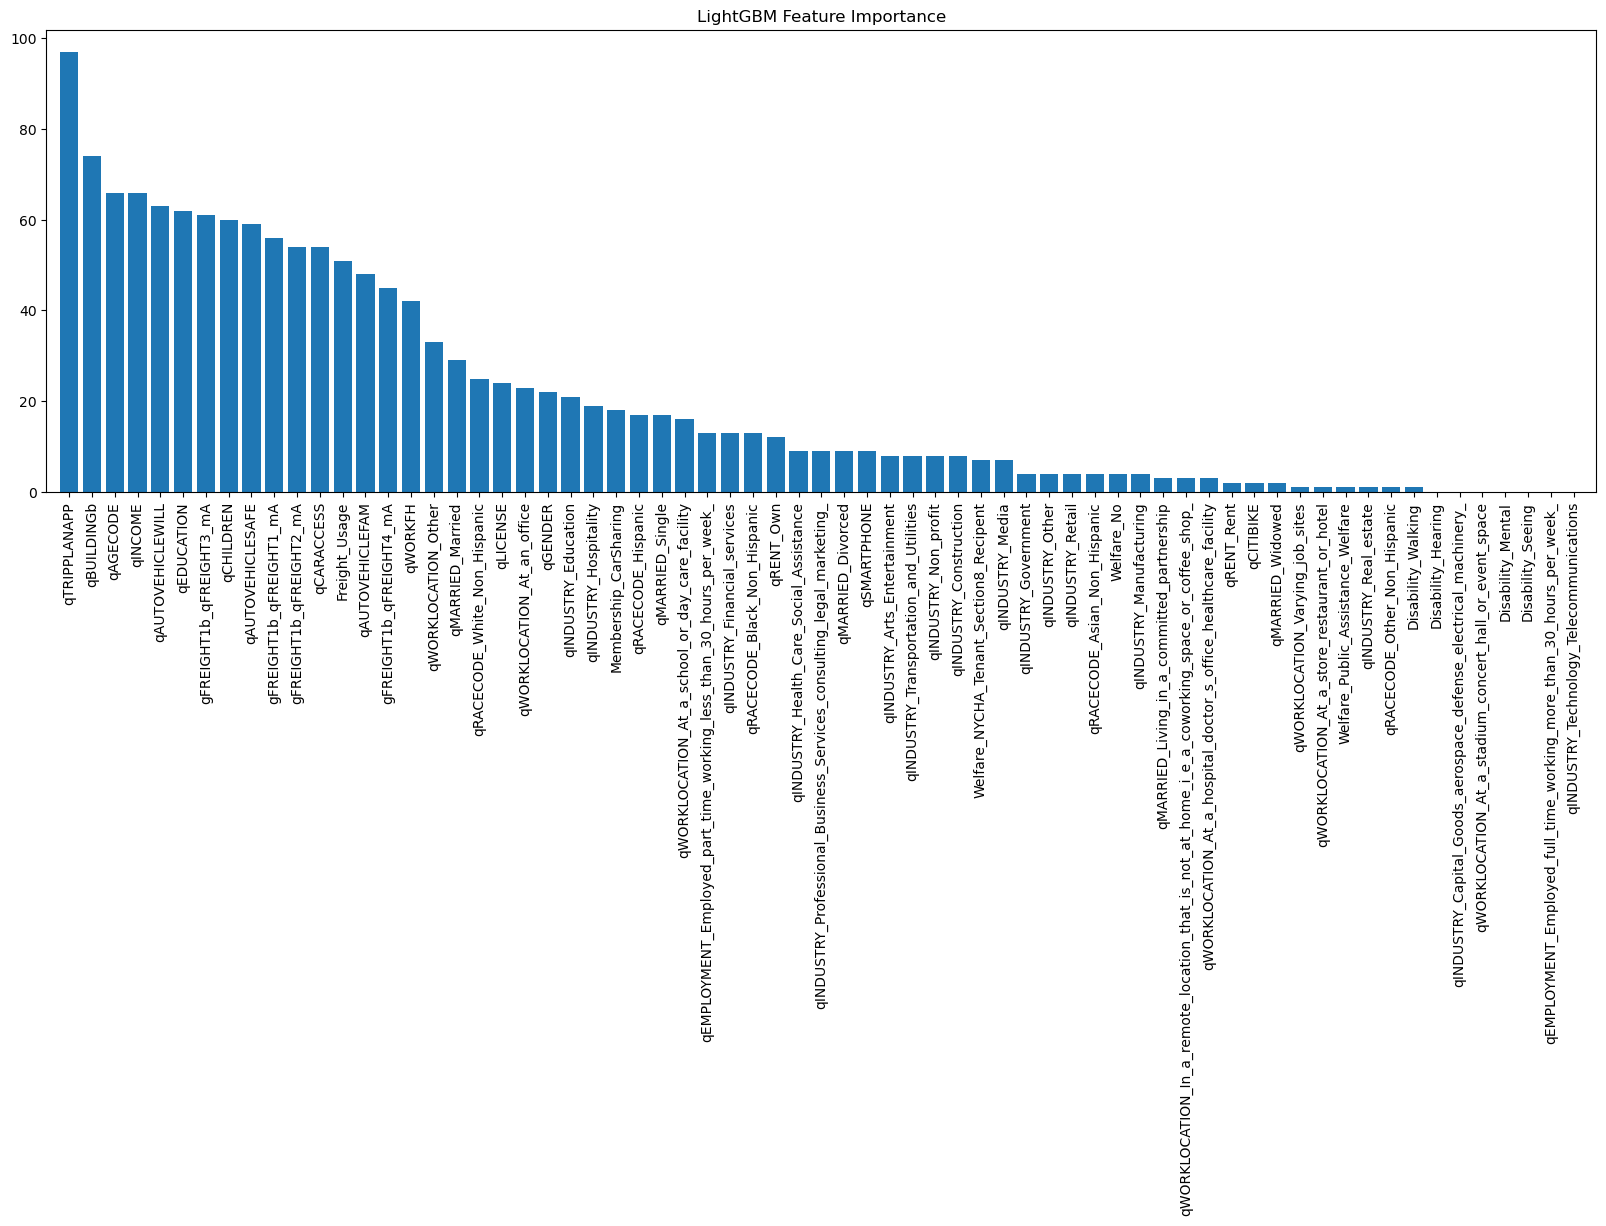

Accuracy: 0.6666666666666666


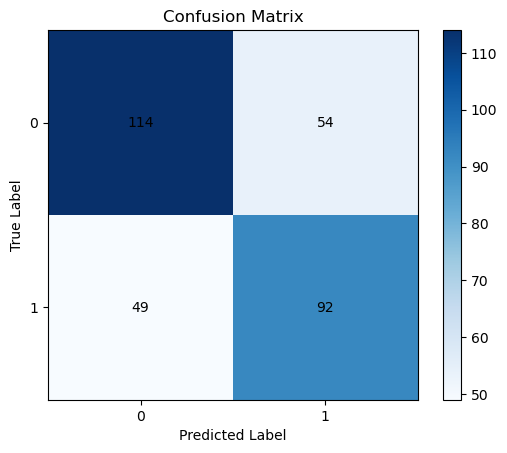

In [113]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Train/Subway'].astype(int), test_size=0.2, random_state=1,stratify=y_multi_enc['Walk'])

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# replace special characters in feature names with underscores
def clean_feature_names(feature_names):
    # regular expression to match non-alphanumeric characters and underscores
    pattern = r'[^\w_]+'
    # remove special characters and keep only alphanumeric characters and underscores in feature names
    clean_names = [re.sub(pattern, '_', name) for name in feature_names]
    return clean_names

# use clean_feature_names function to clean feature names
new_feature_names = clean_feature_names(X_train.columns)

# replace original feature names with new feature names
X_train.columns = new_feature_names
X_test.columns = new_feature_names

# LightGBM classification
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1, random_state=1)

# define parameter grid for grid search
# param_grid = {
#     'num_leaves': [15, 31, 63],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200]
# }

param_grid = {
    'num_leaves': [15, 31, 63]
}

# define grid search object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1)

# fit grid search to training data
grid_search.fit(X_train, y_train)

# print best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)

# fit LightGBM model with best hyperparameters found by grid search
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1, random_state=1, **grid_search.best_params_)
lgb_model.fit(X_train, y_train)

# LightGBM feature importance
lgb_importance = lgb_model.feature_importances_

# get indices of feature importance sorted in descending order
lgb_importance_rank = np.argsort(lgb_importance)[::-1]

# print feature names and feature importance values sorted by feature importance
for i in lgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], lgb_importance[i]))

# print top 5 features by importance
top_features = X_train.columns[lgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot LightGBM feature importance in descending order
plt.figure(figsize=(20, 6))
plt.title("LightGBM Feature Importance")
plt.bar(range(X_train.shape[1]), lgb_importance[lgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[lgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix

# predict on test set
y_pred = lgb_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# 在每个单元格中添加标签
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Walk二分类

Train (2058, 67) (2058,)
Test (309, 67) (309,)
Best hyperparameters: {'num_leaves': 63}
Top 5 Features: Index(['qTRIPPLANAPP', 'qBUILDINGb', 'qAGECODE', 'qAUTOVEHICLESAFE',
       'qINCOME'],
      dtype='object')


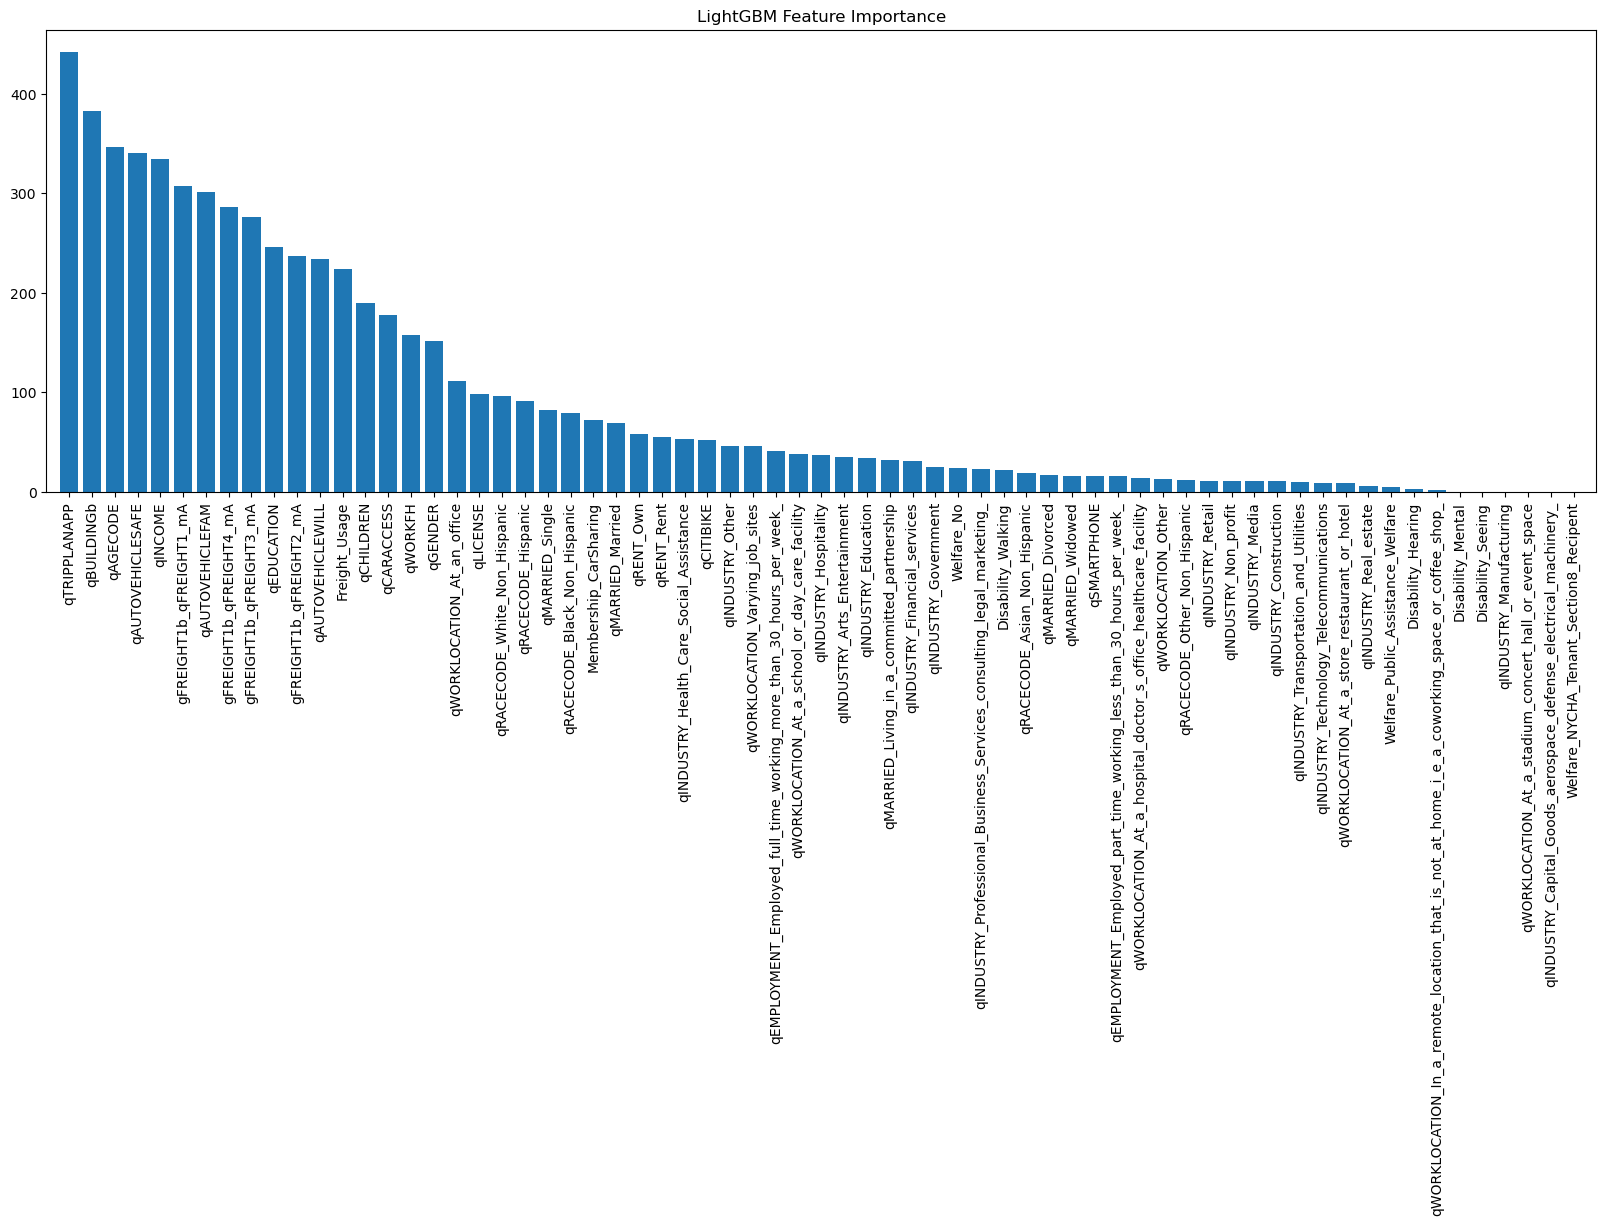

Accuracy: 0.8252427184466019


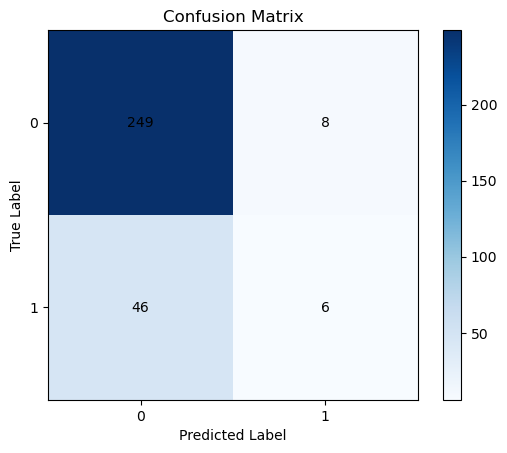

In [114]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'].astype(int), test_size=0.2, random_state=1,stratify=y_multi_enc['Walk'])

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# replace special characters in feature names with underscores
def clean_feature_names(feature_names):
    # regular expression to match non-alphanumeric characters and underscores
    pattern = r'[^\w_]+'
    # remove special characters and keep only alphanumeric characters and underscores in feature names
    clean_names = [re.sub(pattern, '_', name) for name in feature_names]
    return clean_names

# use clean_feature_names function to clean feature names
new_feature_names = clean_feature_names(X_train.columns)

# replace original feature names with new feature names
X_train.columns = new_feature_names
X_test.columns = new_feature_names

# LightGBM classification
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1, random_state=1)

# define parameter grid for grid search
# param_grid = {
#     'num_leaves': [15, 31, 63],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200]
# }

param_grid = {
    'num_leaves': [15, 31, 63]
}

# define grid search object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1)

# fit grid search to training data
grid_search.fit(X_train, y_train)

# print best hyperparameters found by grid search
print('Best hyperparameters:', grid_search.best_params_)

# fit LightGBM model with best hyperparameters found by grid search
lgb_model = lgb.LGBMClassifier(objective='binary', num_class=1, random_state=1, **grid_search.best_params_)
lgb_model.fit(X_train, y_train)

# LightGBM feature importance
lgb_importance = lgb_model.feature_importances_

# get indices of feature importance sorted in descending order
lgb_importance_rank = np.argsort(lgb_importance)[::-1]

# print feature names and feature importance values sorted by feature importance
for i in lgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], lgb_importance[i]))

# print top 5 features by importance
top_features = X_train.columns[lgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot LightGBM feature importance in descending order
plt.figure(figsize=(20, 6))
plt.title("LightGBM Feature Importance")
plt.bar(range(X_train.shape[1]), lgb_importance[lgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[lgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix

# predict on test set
y_pred = lgb_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# 在每个单元格中添加标签
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## 多分类

In [118]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Group']-1, test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE(k_neighbors=3)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3296, 67) (3296,)
Test (309, 67) (309,)


# XGBoost 多分类

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=150; total time=   1.5s
[CV] END ...................................n_est

<Figure size 640x480 with 0 Axes>

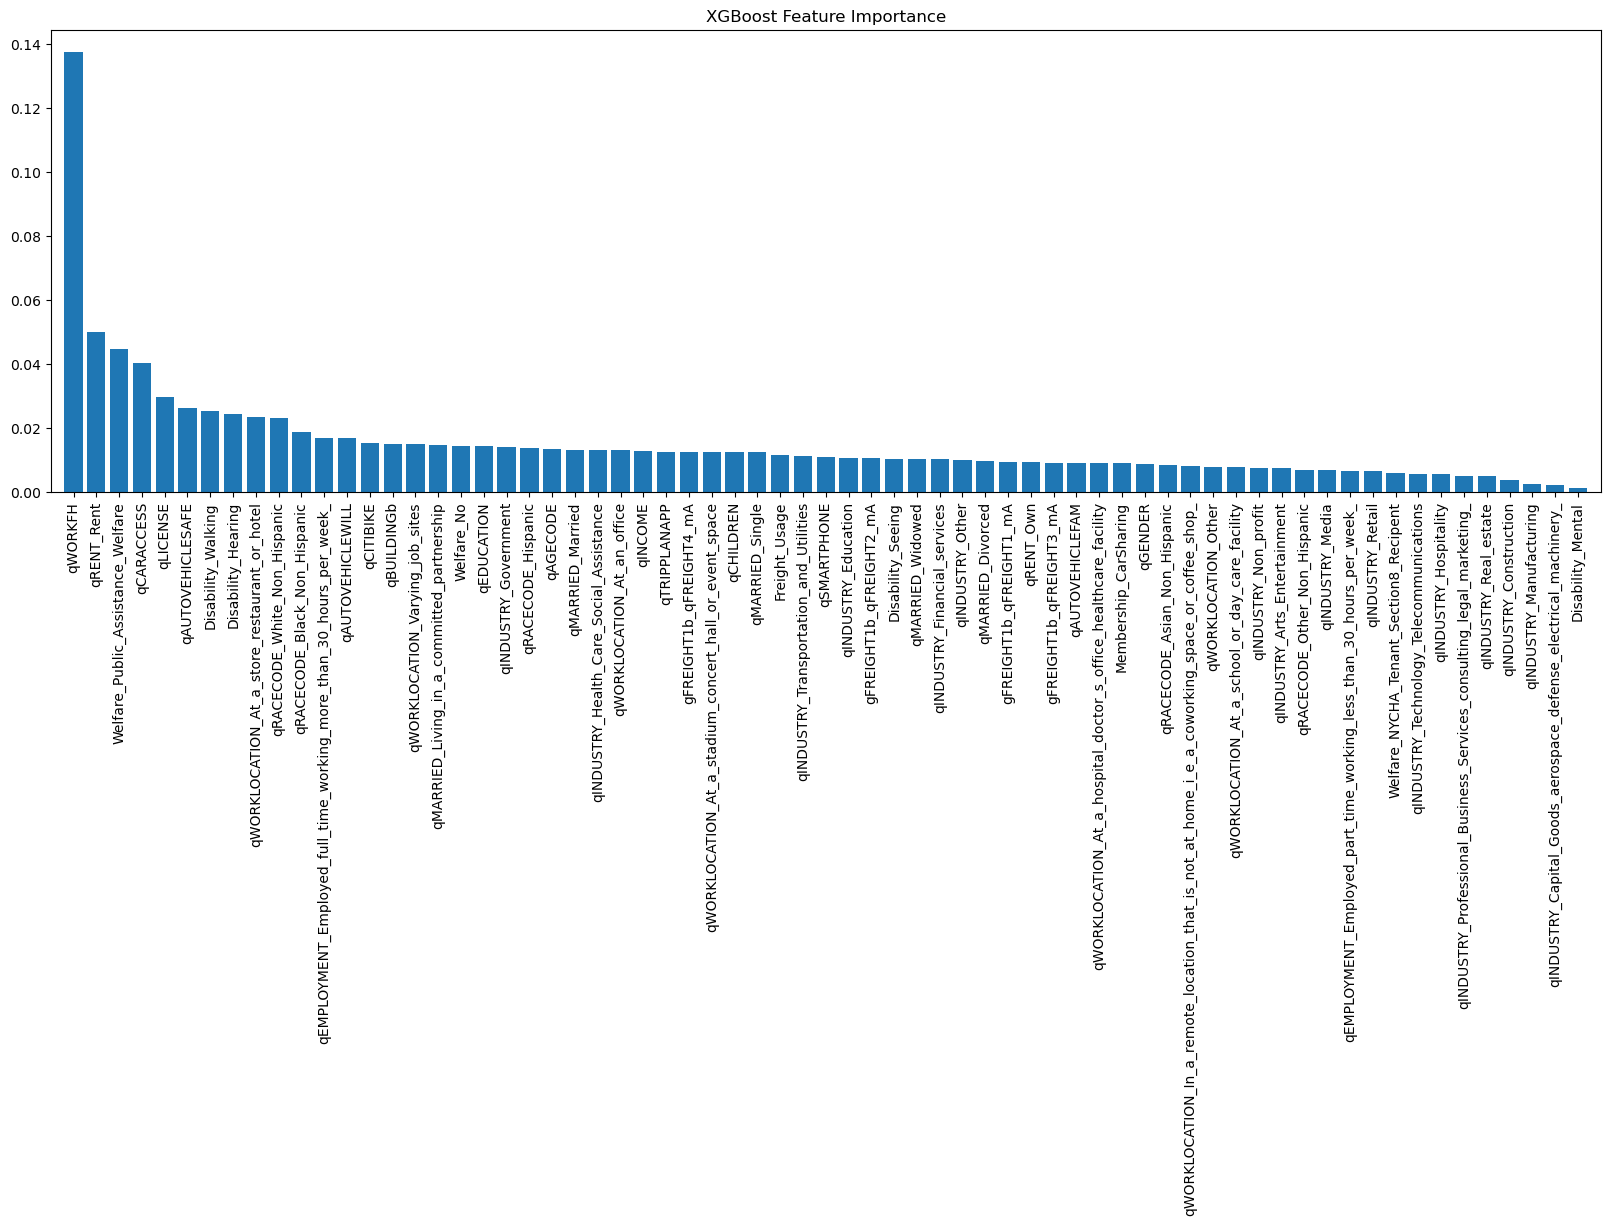

Accuracy: 0.46601941747572817


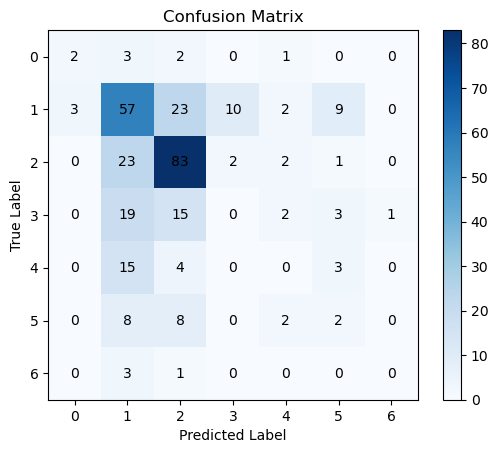

In [119]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import GridSearchCV

# clean feature names
def clean_feature_names(feature_names):
    # regular expression, matching non-alphanumeric characters and underscores
    pattern = r'[^\w_]+'
    # remove special characters and keep only alphanumeric characters and underscores
    clean_names = [re.sub(pattern, '_', name) for name in feature_names]
    return clean_names

# clean feature names
new_feature_names = clean_feature_names(X_train.columns)

# replace original feature names with new feature names
X_train.columns = new_feature_names
X_test.columns = new_feature_names

# XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=1)

# define parameter grid for grid search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 1]
# }

param_grid = {
    'n_estimators': [50, 100, 150],
}

# perform grid search using 5-fold cross validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# use best parameters to train XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=1, **grid_search.best_params_)
xgb_model.fit(X_train, y_train)

# XGBoost feature importance
xgb_importance = xgb_model.feature_importances_

# get feature importance rank
xgb_importance_rank = np.argsort(xgb_importance)[::-1]

# output feature name and feature importance in descending order
for i in xgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], xgb_importance[i]))

# output top 5 most important features
top_features = X_train.columns[xgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot XGBoost feature importance
plt.figure()
plt.figure(figsize=(20, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(X_train.shape[1]), xgb_importance[xgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[xgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix

# predict on test set
y_pred = xgb_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()





# Lightgbm 多分类

Top 5 Features: Index(['qINCOME', 'qTRIPPLANAPP', 'qEDUCATION', 'qBUILDINGb', 'qAGECODE'], dtype='object')


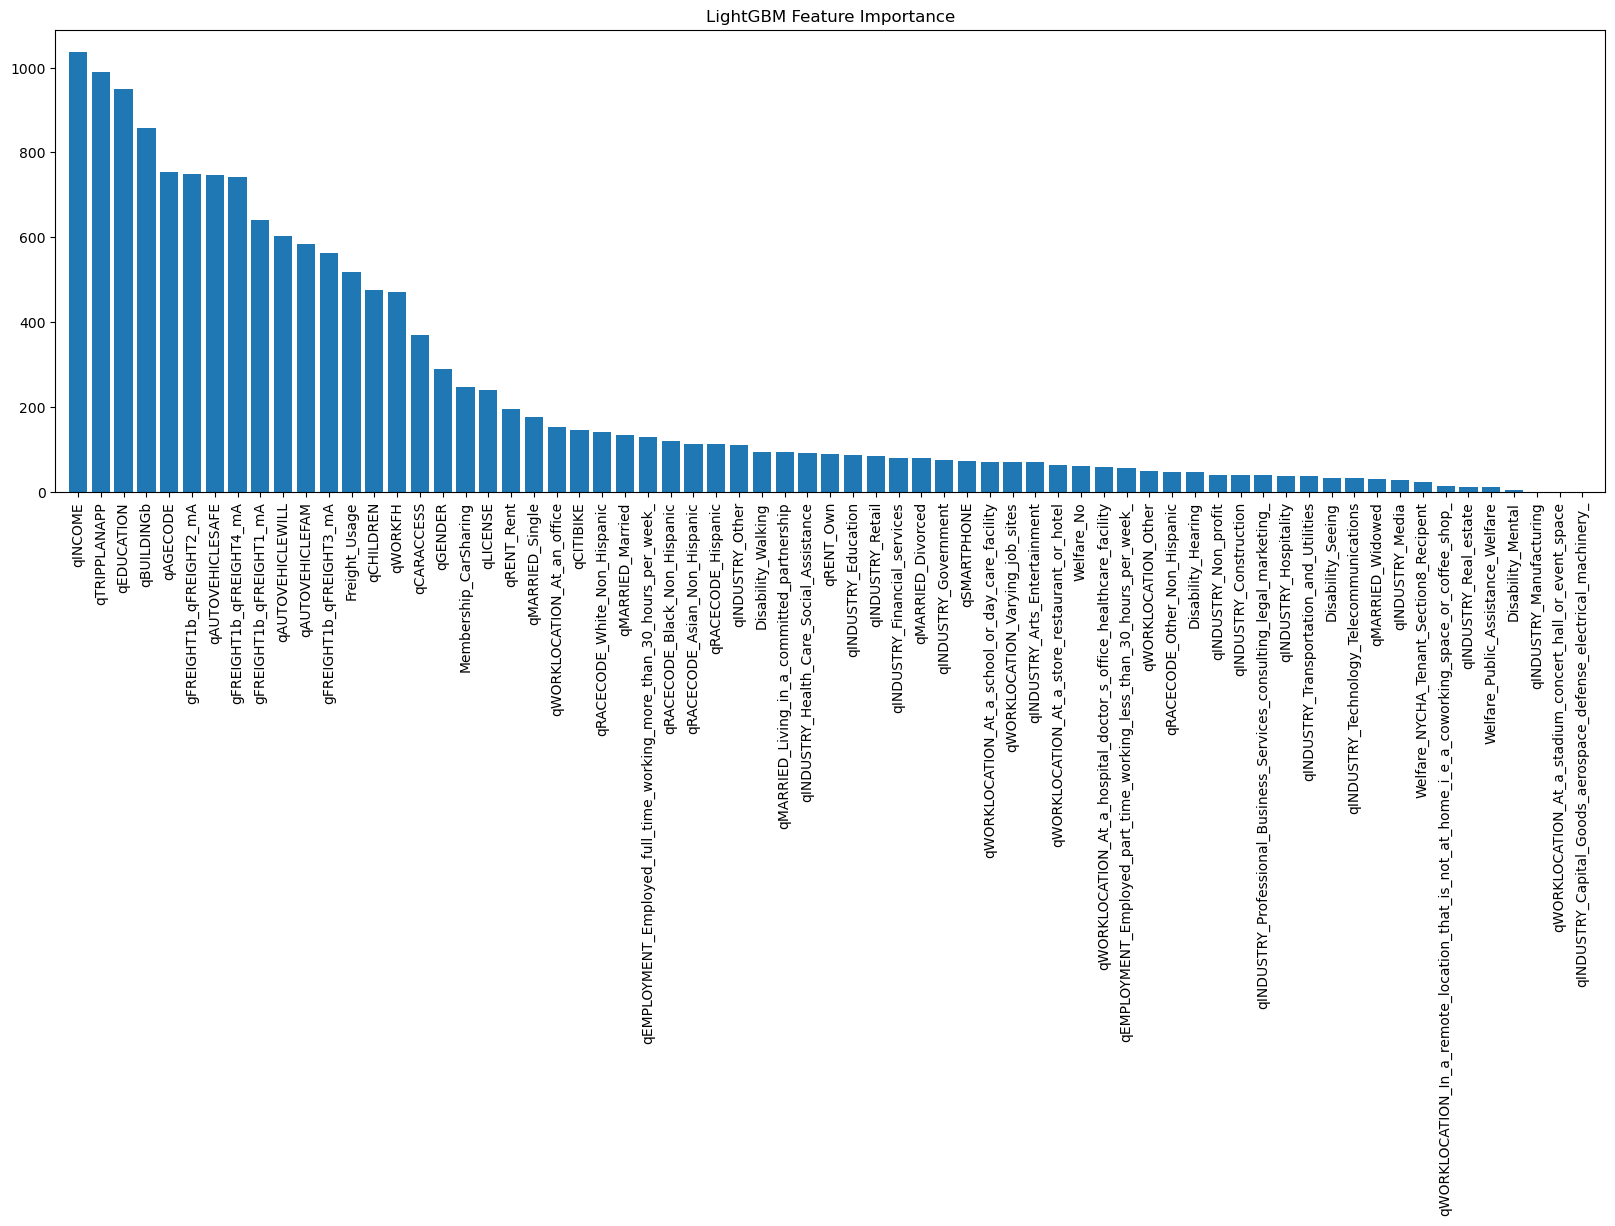

Accuracy: 0.47896440129449835


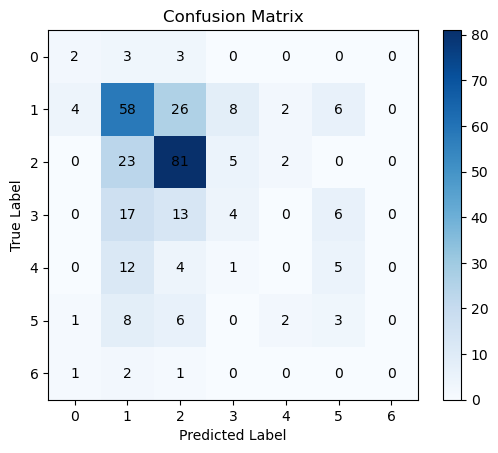

In [121]:

# clean feature names using clean_feature_names function
new_feature_names = clean_feature_names(X_train.columns)

# replace original feature names with new feature names
X_train.columns = new_feature_names
X_test.columns = new_feature_names

# LightGBM multiclass classification
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(np.unique(y_train)), random_state=1)

# grid search for hyperparameter tuning
# params = {'num_leaves': [10, 20, 30], 'learning_rate': [0.1, 0.05, 0.01]}
params = {'num_leaves': [10, 20]}
grid_search = GridSearchCV(lgb_model, params, cv=5)
grid_search.fit(X_train, y_train)

# fit the model with best hyperparameters
lgb_model = grid_search.best_estimator_
lgb_model.fit(X_train, y_train)

# LightGBM feature importance
lgb_importance = lgb_model.feature_importances_

# get the sorted indices of feature importances
lgb_importance_rank = np.argsort(lgb_importance)[::-1]

# print feature names and feature importance values sorted by feature importance
for i in lgb_importance_rank:
    continue
    print("{}: {}".format(X_train.columns[i], lgb_importance[i]))

# print the top 5 most important features
top_features = X_train.columns[lgb_importance_rank[:5]]
print("Top 5 Features:", top_features)

# plot LightGBM feature importance chart
plt.figure(figsize=(20, 6))
plt.title("LightGBM Feature Importance")
plt.bar(range(X_train.shape[1]), lgb_importance[lgb_importance_rank], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[lgb_importance_rank], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


from sklearn.metrics import accuracy_score, confusion_matrix

# predict on the test set
y_pred = lgb_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title("Confusion Matrix")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()

# add labels to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Multi-Label Classification(不太理解这部分的内容)

In [38]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [40]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1235, 67) (1235, 4)
Test (309, 67) (309, 4)


In [41]:
clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_train)
clf.score(X_test,y_test)

0.40129449838187703

In [42]:
svc = SVC(gamma="scale")
model = MultiOutputClassifier(estimator=svc)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.4401294498381877

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs'), n_jobs=-1)),
            ])
for category in alter_col:

    print('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    y_train_enc, y_test_enc = prepare_targets(y_train[category], y_test[category])
    LogReg_pipeline.fit(X_train_enc, y_train_enc)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(y_test_enc)
    print('Test accuracy is {}'.format(accuracy_score(y_test_enc, prediction)))
    print("\n")

**Processing Walk ...**


NameError: name 'prepare_targets' is not defined

In [31]:
from sklearn.model_selection import GridSearchCV
import time
from skmultilearn.adapt import BRkNNaClassifier

parameters = {'k': range(3,5)}
score = 'f1_micro'

start=time.time()

classifier = GridSearchCV(BRkNNaClassifier(), parameters, scoring=score)
classifier.fit(X_train_enc, y_train_enc)

print('training time taken: ',round(time.time()-start,0),'seconds')
print('best parameters :', classifier.best_params_,
      'best score: ',classifier.best_score_)

ModuleNotFoundError: No module named 'skmultilearn'

In [32]:
# using binary relevance
# !pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(X_train_enc, y_train_enc)
# predict
predictions = classifier.predict(X_test_enc)
# accuracy
print("Accuracy = ",accuracy_score(y_test_enc,predictions.toarray()))

ModuleNotFoundError: No module named 'skmultilearn'

In [33]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_enc, y_train_enc)
# predict
predictions = classifier.predict(X_test_enc)
# accuracy
print("Accuracy = ",accuracy_score(y_test_enc,predictions.toarray()))

ModuleNotFoundError: No module named 'skmultilearn'